# Problem Statement
* Here We are provided with the monthly information for a segment of drivers for 2019 and 2020 and the goal predict whether a driver will be leaving the company or not based on their attributes like

  * Demographics (city, age, gender etc.)
  * Tenure information (joining date, Last Date)
  * Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('ola_driver_scaler.csv',parse_dates = ['Dateofjoining','LastWorkingDate','MMM-YY'])

## Basice Exploration of Data

In [ ]:
data

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [ ]:
data.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [ ]:
data.rename({'MMM-YY':'reporting_date'},axis = 1,inplace = True)

In [ ]:
data.head()

,reporting_date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
data.shape

(19104, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reporting_date        19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
data.drop_duplicates(inplace = True)

#### Number of Unique values in Each Column

In [ ]:
for i in data.columns:
  print('='*70)
  print()
  print(f'Number of unique values in {i} feature are : {data[i].nunique()}')
  print()


Number of unique values in reporting_date feature are : 24


Number of unique values in Driver_ID feature are : 2381


Number of unique values in Age feature are : 36


Number of unique values in Gender feature are : 2


Number of unique values in City feature are : 29


Number of unique values in Education_Level feature are : 3


Number of unique values in Income feature are : 2383


Number of unique values in Dateofjoining feature are : 869


Number of unique values in LastWorkingDate feature are : 493


Number of unique values in Joining Designation feature are : 5


Number of unique values in Grade feature are : 5


Number of unique values in Total Business Value feature are : 10181


Number of unique values in Quarterly Rating feature are : 4



* We have data of 2381 drivers who have different reporting dates and Joining dates.

#### Statistical information of the data

In [ ]:
data.describe().round(2)

,reporting_date,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.00,19043.00,19052.00,19104.00,19104.00,19104,1616,19104.00,19104.00,19104.00,19104.00
mean,2019-12-11 02:09:29.849246464,1415.59,34.67,0.42,1.02,65652.03,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.69,2.25,571662.07,2.01
min,2019-01-01 00:00:00,1.00,21.00,0.00,0.00,10747.00,2013-04-01 00:00:00,2018-12-31 00:00:00,1.00,1.00,-6000000.00,1.00
25%,2019-06-01 00:00:00,710.00,30.00,0.00,0.00,42383.00,2016-11-29 12:00:00,2019-06-06 00:00:00,1.00,1.00,0.00,1.00
50%,2019-12-01 00:00:00,1417.00,34.00,0.00,1.00,60087.00,2018-09-12 00:00:00,2019-12-20 12:00:00,1.00,2.00,250000.00,2.00
75%,2020-07-01 00:00:00,2137.00,39.00,1.00,2.00,83969.00,2019-11-05 00:00:00,2020-07-03 00:00:00,2.00,3.00,699700.00,3.00
max,2020-12-01 00:00:00,2788.00,58.00,1.00,2.00,188418.00,2020-12-28 00:00:00,2020-12-28 00:00:00,5.00,5.00,33747720.00,4.00
std,NaN,810.71,6.26,0.49,0.80,30914.52,NaN,NaN,0.84,1.03,1128312.22,1.01


* **Mean** age of the drivers is **34.67** years.
* Mean income is 65652.03 rs but **median** income is 60087 which infers that data is right skewed and presence of Outliers.
* Mean Education level of the drivers is **12+**
* **Mean** total business value (monthly) acquired by the drivers is **571662.07** whereas **median** value for the same is **2500000** which may show that most of the business value has gone for refund or cancellation or car EMI.We will validate this further.

#### Analysing basic structure of the data

In [ ]:
data.head()

,reporting_date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
data[data['Driver_ID'] == 1]

,reporting_date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2


* The data is not in aggregated format.
* Multiple records of unique driver id wont give exact picture, therefore aggregation of data is required.

#### Restructuring the dataframe

In [ ]:


agg_df = data.groupby(["Driver_ID"]).aggregate(
    records_count=('reporting_date', 'count'),
    age=('Age', 'max'),
    city=('City', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    education_level=('Education_Level', 'max'),
    income=('Income', 'mean'),
    date_of_joining=('Dateofjoining', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    joining_designation=('Joining Designation', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    grade=('Grade', 'mean'),
    tbv=('Total Business Value', 'sum'),
    quaterly_rating=('Quarterly Rating', 'mean')
)


In [ ]:
agg_df['quaterly_rating'] = agg_df['quaterly_rating'].round(2)

In [ ]:
agg_df.reset_index(inplace = True)

In [ ]:
agg_df

,Driver_ID,records_count,age,city,education_level,income,date_of_joining,joining_designation,grade,tbv,quaterly_rating
0,1,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.00
1,2,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.00
2,4,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.00
3,5,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.00
4,6,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.60
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.62
2377,2785,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.00
2378,2786,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.67
2379,2787,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.50


In [ ]:
agg_df.columns

Index(['Driver_ID', 'records_count', 'age', 'city', 'education_level',
       'income', 'date_of_joining', 'joining_designation', 'grade', 'tbv',
       'quaterly_rating'],
      dtype='object')

##### Mapping exclusive features such as gender and last working date for each driver id

In [ ]:
final_data = pd.merge(left = data.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = agg_df,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
final_data = pd.merge(left = data.groupby(['Driver_ID'])['Gender'].unique().apply(lambda x:x[-1]),right = final_data, on = 'Driver_ID',how = 'outer')

In [ ]:
final_data

,Driver_ID,Gender,LastWorkingDate,records_count,age,city,education_level,income,date_of_joining,joining_designation,grade,tbv,quaterly_rating
0,1,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.00
1,2,0.0,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.00
2,4,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.00
3,5,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.00
4,6,1.0,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.62
2377,2785,1.0,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.00
2378,2786,0.0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.67
2379,2787,1.0,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.50


In [ ]:
data_1 = final_data.copy()

#### Checking null values

In [ ]:
import missingno as msno

In [ ]:
round(data_1.isnull().sum()*100/len(data_1),2)

Driver_ID               0.00
Gender                  1.89
LastWorkingDate        32.13
records_count           0.00
age                     0.00
city                    0.00
education_level         0.00
income                  0.00
date_of_joining         0.00
joining_designation     0.00
grade                   0.00
tbv                     0.00
quaterly_rating         0.00
dtype: float64

<Axes: >

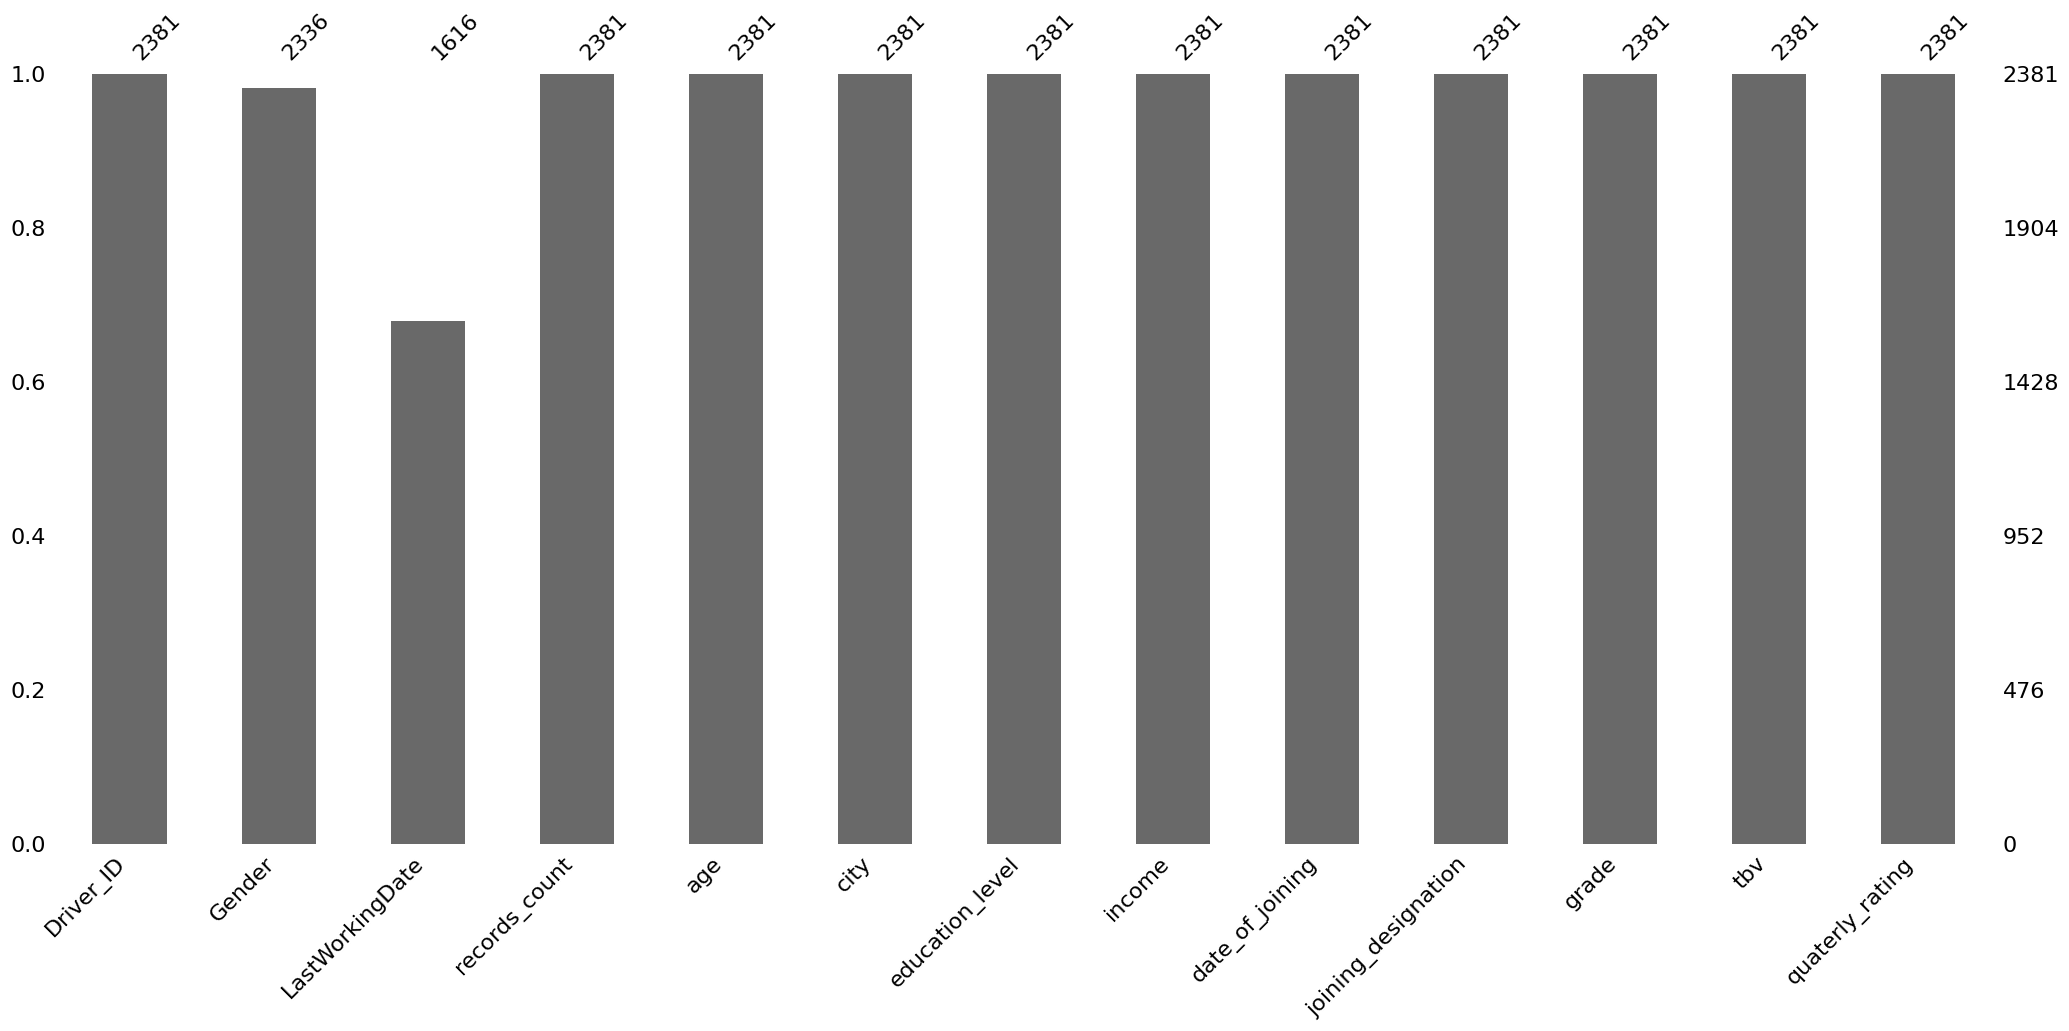

In [ ]:
msno.bar(data_1)

* Except Gender and LastWorkingDate all other columns have no null values.

#### Creating target variable

In [ ]:
pd.Series(np.where(data_1['LastWorkingDate'].isna(),0,1)).value_counts()

1    1616
0     765
Name: count, dtype: int64

* 1 --> Churned
* 0 --> Not Churned

In [ ]:
data_1['churn'] = data_1['LastWorkingDate'].fillna(0)

In [ ]:
def apply_0_1(y):
    if y == 0:
        return 0
    return 1

In [ ]:
data_1['churn'] = data_1['churn'].apply(apply_0_1)

In [ ]:
round(data_1['churn'].value_counts()*100 / len(data_1['churn']),2)

churn
1    67.87
0    32.13
Name: count, dtype: float64

* Around **68%** of drivers have churned.
* It can also be observed that Data is **imbalanced**.

# Feature Engineering
 * In this a feature is created which will tell whether the **quarterly** **rating** has increased for that driver (for those whose quarterly rating has increased we assign the value 1.)
 * Along with that another feature will be created which would tell that whether the **monthly income** has increased for that driver (for those whose monthly income has increased we assign the value 1)

In [ ]:
def app_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
Quarterly_Rating_increased = data.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [ ]:
# for increased rating drivers
data_2 = pd.merge(left = Quarterly_Rating_increased,
        right = data_1,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
data_2["Quarterly_Rating_increased"] = data_2["Quarterly Rating"]

In [ ]:
# for increased income drivers
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
data_2 = pd.merge(left = data.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data_2,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
data_2.drop("Quarterly Rating",axis = 1 , inplace = True)

In [ ]:
data_2

,Driver_ID,Increased_Income,Gender,LastWorkingDate,records_count,age,city,education_level,income,date_of_joining,joining_designation,grade,tbv,quaterly_rating,churn,Quarterly_Rating_increased
0,1,0,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.00,1,0
1,2,0,0.0,NaT,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.00,0,0
2,4,0,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.00,1,0
3,5,0,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.00,1,0
4,6,0,1.0,NaT,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,0.0,NaT,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.62,0,1
2377,2785,0,1.0,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.00,1,0
2378,2786,0,0.0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.67,1,0
2379,2787,0,1.0,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.50,1,0


In [ ]:
data_3 = data_2.copy()

In [ ]:
data_3.drop('Driver_ID',axis = 1 , inplace = True)

In [ ]:
data_3.drop(["LastWorkingDate","date_of_joining"],axis = 1 , inplace = True)

# Univariate Analysis

In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Increased_Income            2381 non-null   int64  
 1   Gender                      2336 non-null   float64
 2   records_count               2381 non-null   int64  
 3   age                         2381 non-null   float64
 4   city                        2381 non-null   object 
 5   education_level             2381 non-null   int64  
 6   income                      2381 non-null   float64
 7   joining_designation         2381 non-null   int64  
 8   grade                       2381 non-null   float64
 9   tbv                         2381 non-null   int64  
 10  quaterly_rating             2381 non-null   float64
 11  churn                       2381 non-null   int64  
 12  Quarterly_Rating_increased  2381 non-null   int64  
dtypes: float64(5), int64(7), object(1

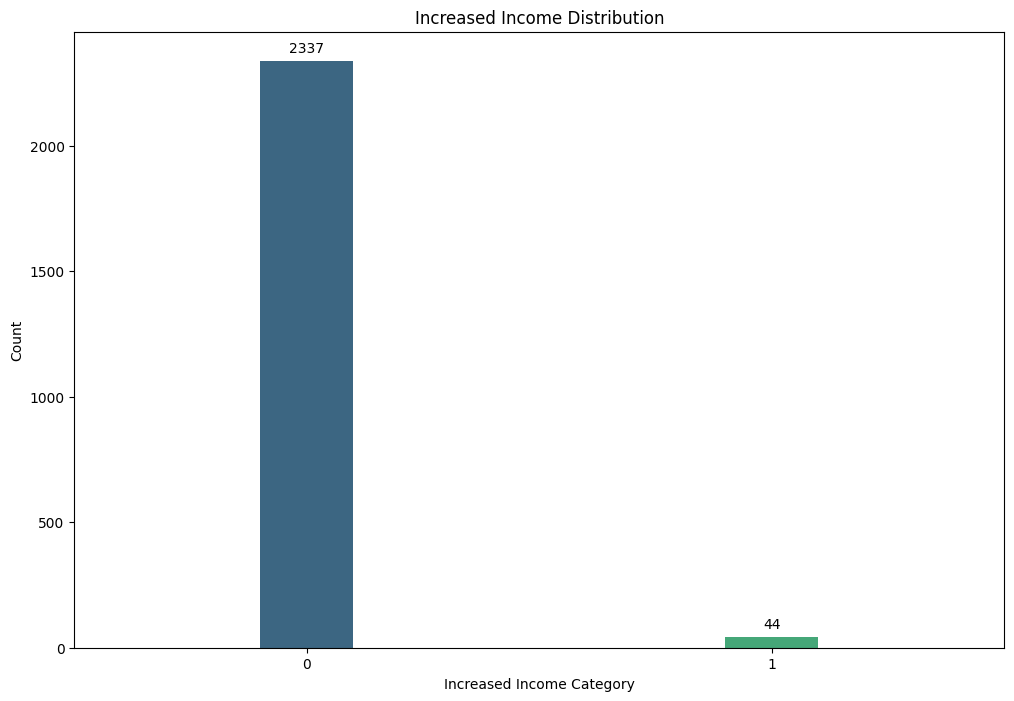

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data_3, x='Increased_Income', width=0.2, palette='viridis')
plt.xlabel('Increased Income Category', fontsize=10)
plt.ylabel('Count')
plt.title('Increased Income Distribution', fontsize=12)

# Adding annotations to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

* Income of most of the drivers has not increased compared to that of the last month.


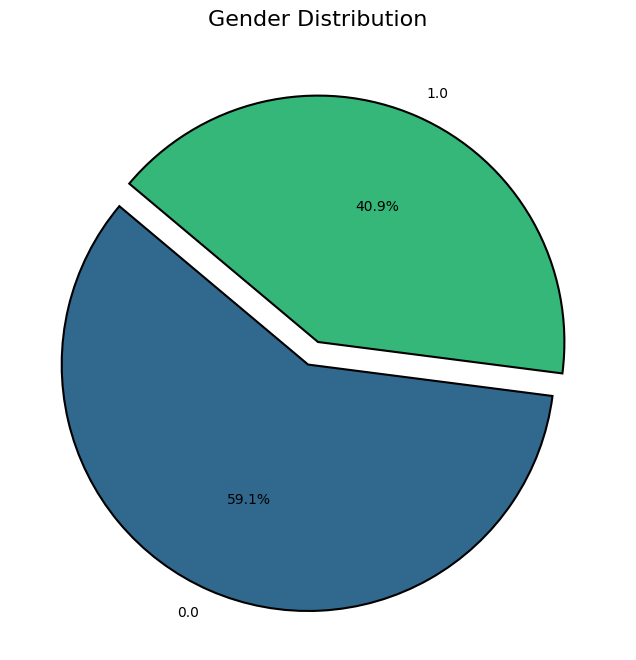

In [ ]:
# Count the occurrences of each gender
gender_counts = pd.Series(data_3['Gender']).value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', len(gender_counts))
explode = (0.1, 0)  # Exploding the first slice (Male)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

plt.title('Gender Distribution', fontsize=16)
plt.show()

* Male --> 0
* Female --> 1
* Majority drivers are Male although there is substantial amount of Female drivers.

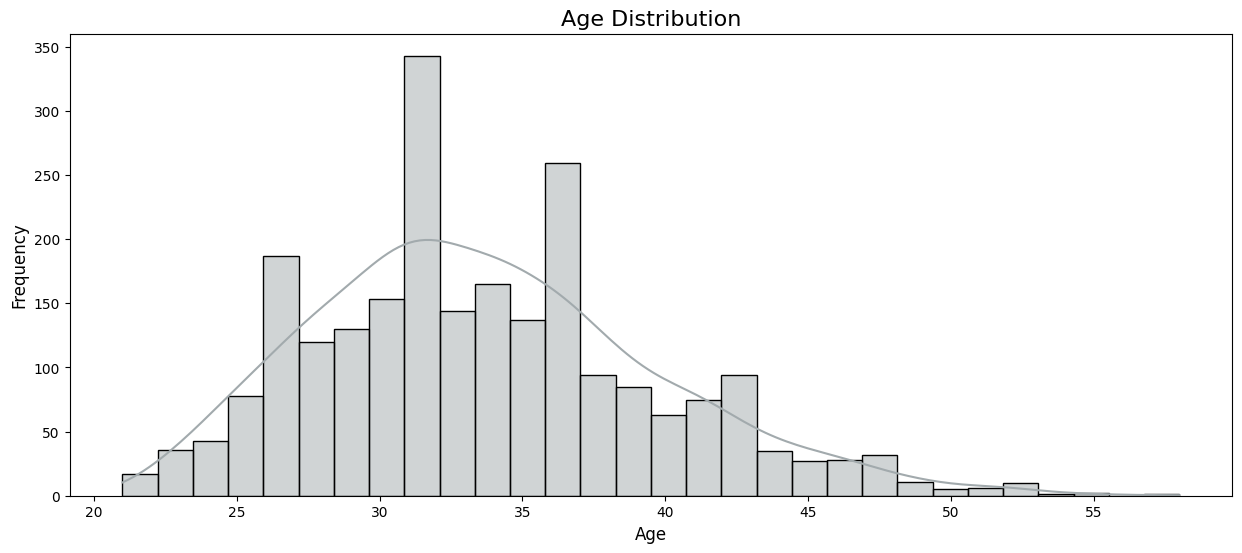

In [ ]:
apple_palette = ["#A2AAAD", "#5C5D60", "#545454", "#6E6E73", "#323232", "#1D1D1F"]

# Plotting the histogram
plt.figure(figsize=(15, 6))
sns.histplot(data=data_3, x='age', bins=30, kde=True, color=apple_palette[0])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution', fontsize=16)
plt.show()

* Age feature is not Normally distributed.
* It is right skewed.

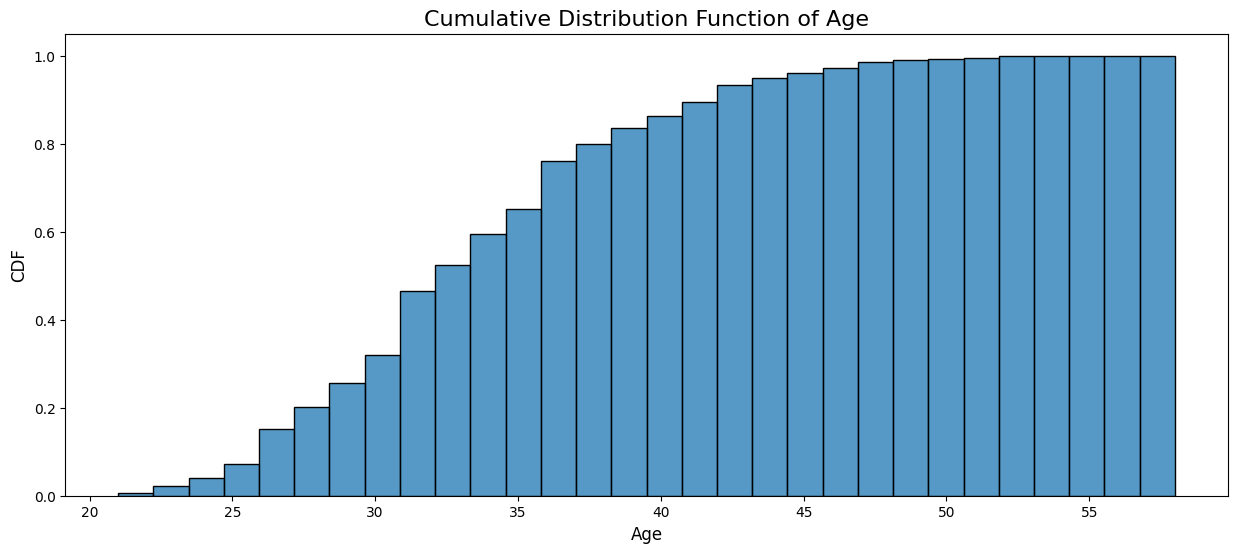

In [ ]:
# Plotting the CDF with a different color palette
plt.figure(figsize=(15, 6))
sns.histplot(data=data_3, x='age', bins=30, kde=False, cumulative=True, palette='coolwarm', stat='density')
plt.xlabel('Age', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.title('Cumulative Distribution Function of Age', fontsize=16)
plt.show()

* Around **90%** drivers have age **less than 45** years.
* Most of the drivers belong to **25 to 45** age group

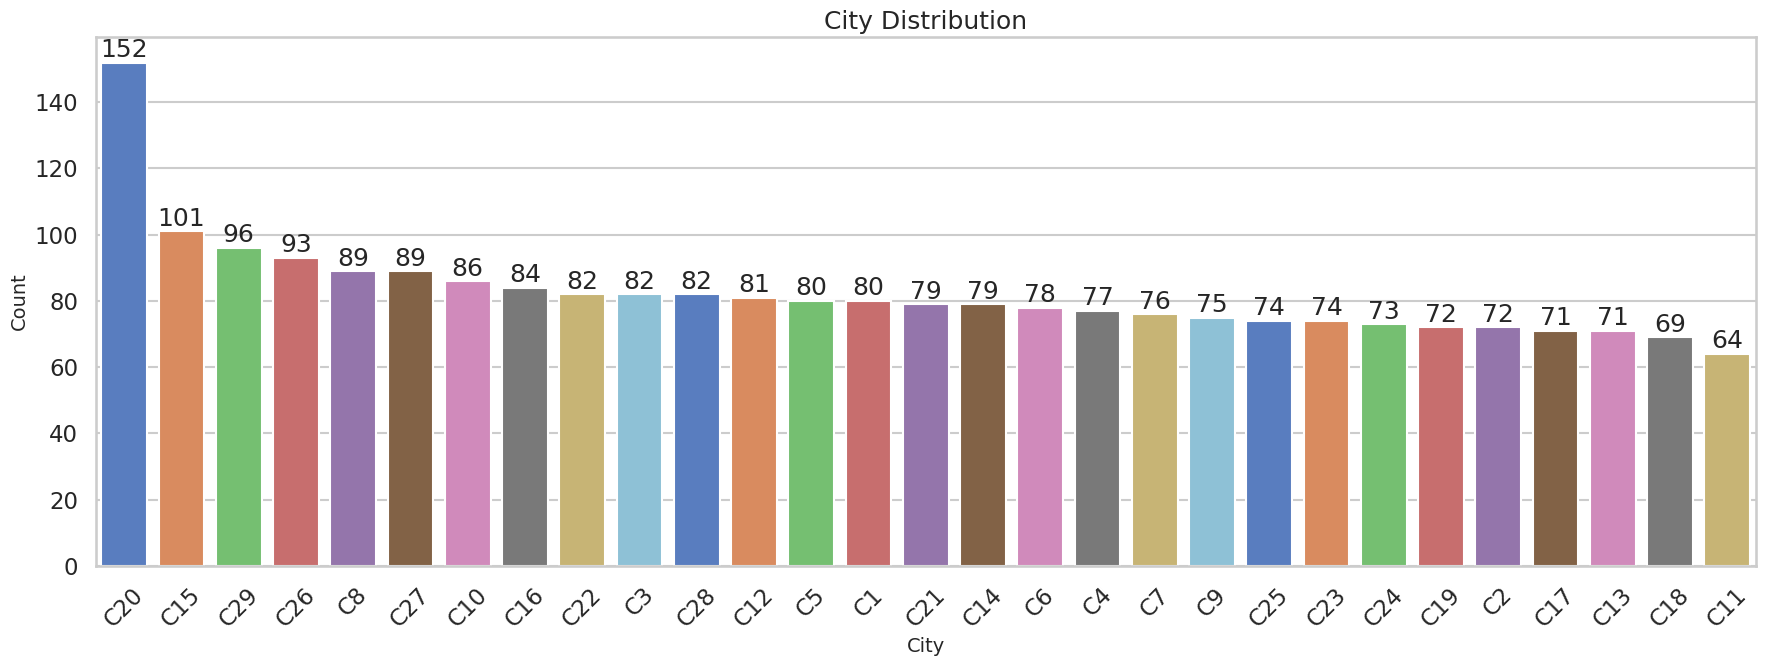

In [ ]:
# Count the occurrences of each city
city_counts = data_3['city'].value_counts()

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the bar plot
plt.figure(figsize=(18, 7))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, palette="muted")

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Set plot labels and title
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('City Distribution', fontsize=18)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

* Majority of Drivers belong to C20 city category followed by C15 city category.
* Very less number of drivers belong to C11 city category

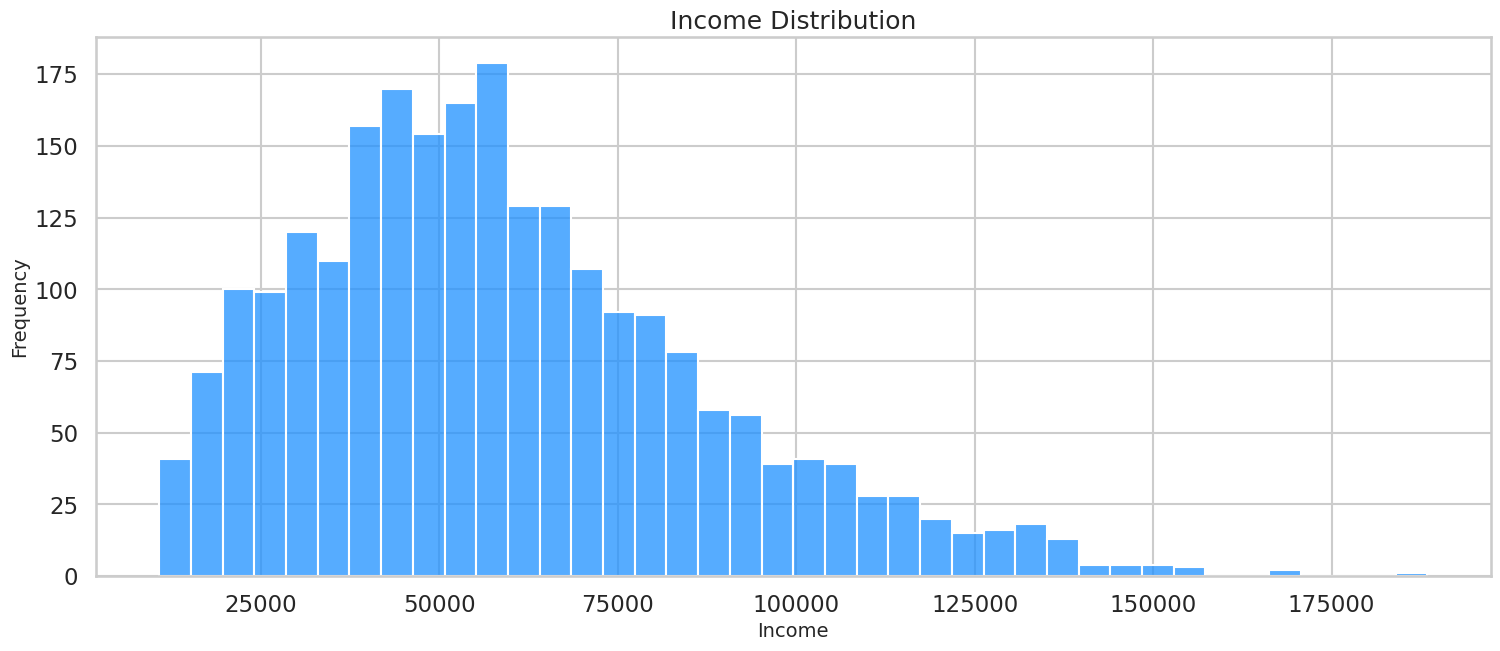

In [ ]:
# Plotting the histogram
plt.figure(figsize=(18, 7))
sns.set(style="whitegrid", context="talk")

sns.histplot(data=data_3, x='income', bins=40, kde=False, color='dodgerblue')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Income Distribution', fontsize=18)
plt.show()


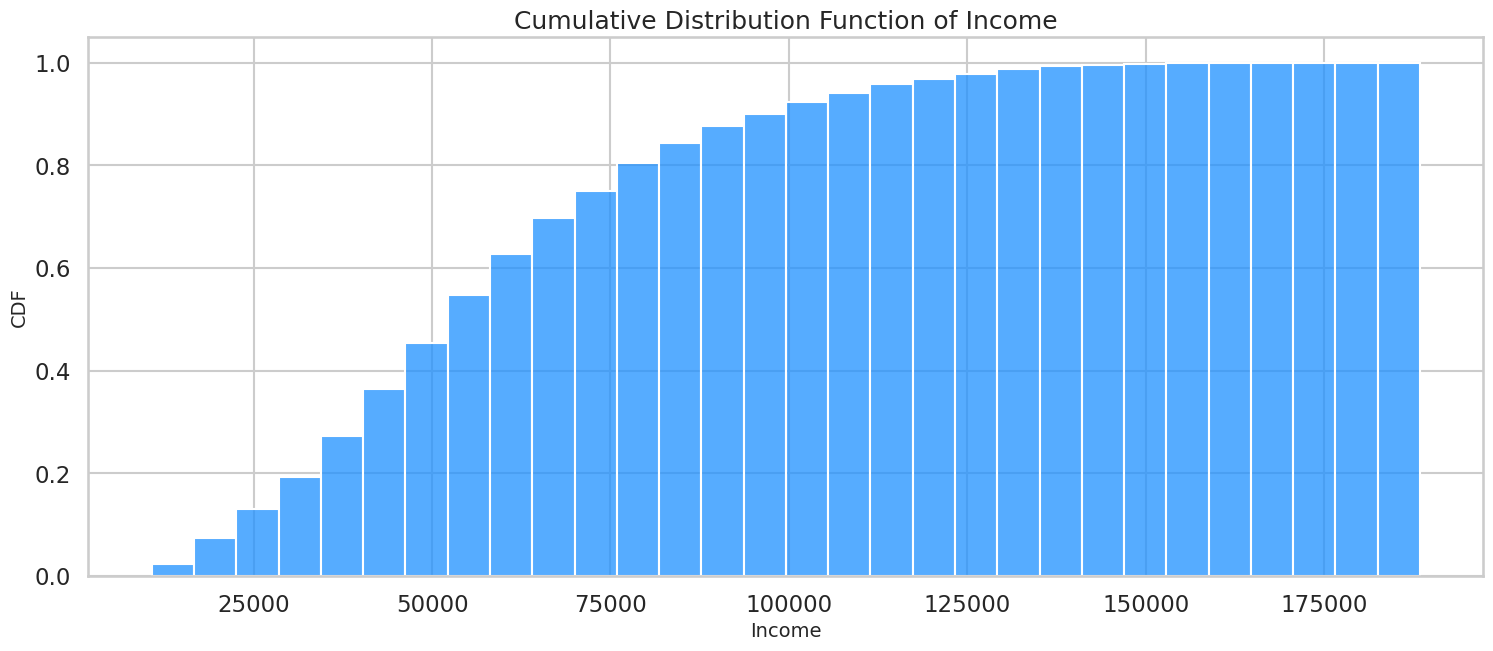

In [ ]:
# Plotting the CDF
plt.figure(figsize=(18, 7))
sns.histplot(data=data_3, x='income', bins=30, kde=False, cumulative=True, color='dodgerblue', stat='density')
plt.xlabel('Income', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Cumulative Distribution Function of Income', fontsize=18)
plt.show()

* **90%** drivers are earning less than **1 lakh rupees**.
* The major income earned lies between **25000 and 75000**.

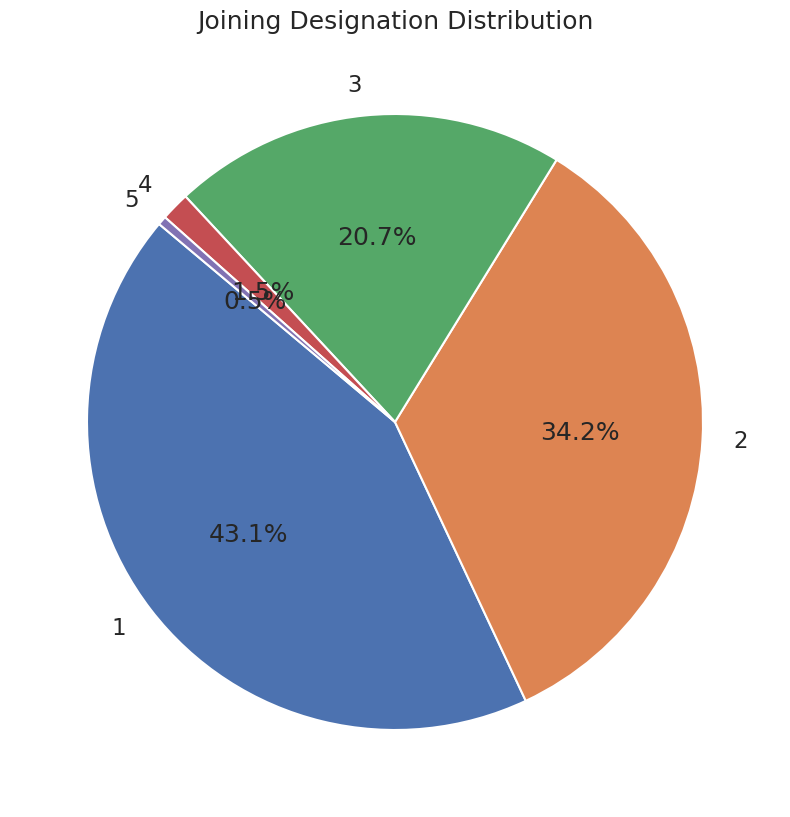

In [ ]:
# Count the occurrences of each designation
designation_counts = data_3['joining_designation'].value_counts()

# Create the pie chart
plt.figure(figsize=(10,10))
plt.pie(designation_counts, labels=designation_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Joining Designation Distribution')

# Show the pie chart
plt.show()

In [ ]:
data_3['grade'] = data_3.grade.round(2)

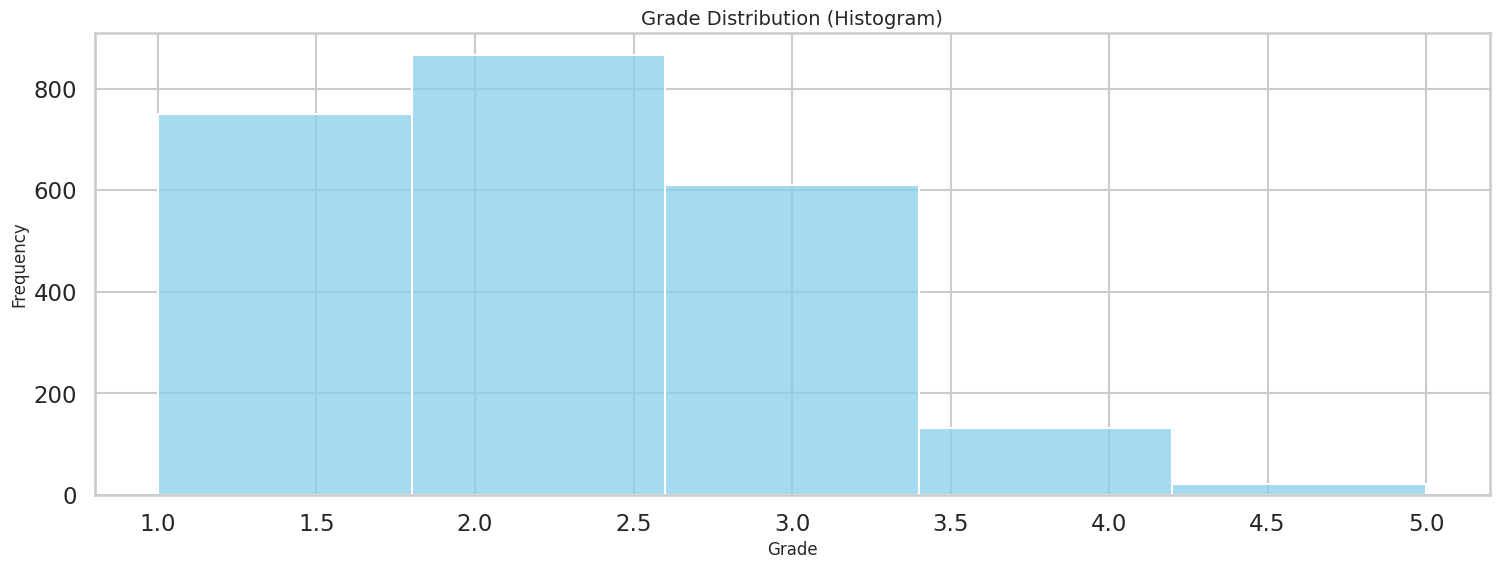

In [ ]:
hist_color = 'skyblue'
# Create the histogram
plt.figure(figsize=(18, 6))
sns.histplot(data=data_3, x='grade', bins=5, kde=False, color=hist_color)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Grade Distribution (Histogram)', fontsize=14)

# Show the histogram
plt.show()

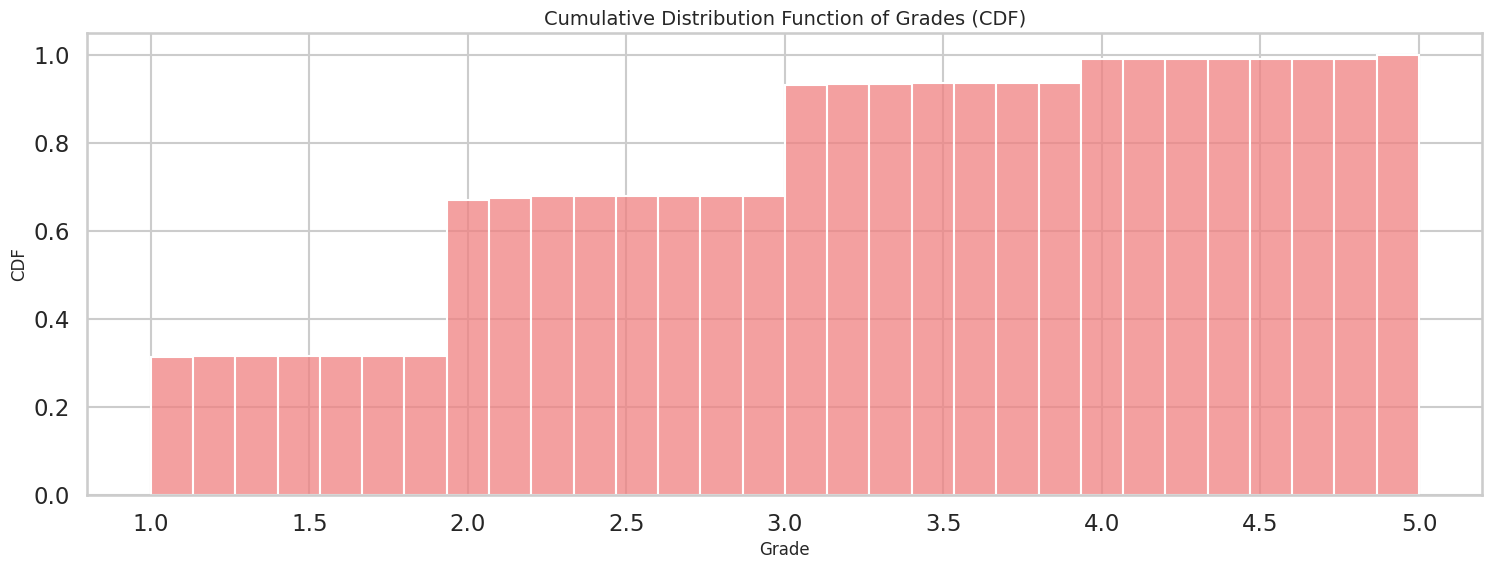

In [ ]:
cdf_color = 'lightcoral'
# Create the CDF plot
plt.figure(figsize=(18, 6))
sns.histplot(data=data_3, x='grade', bins=30, kde=False, cumulative=True, color=cdf_color, stat='density')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.title('Cumulative Distribution Function of Grades (CDF)', fontsize=14)

# Show the CDF plot
plt.show()

* Most of the drivers have Grade between 1.5 to 3.5 at the time of reporting.
* 60% of drivers have Grade less than 3.

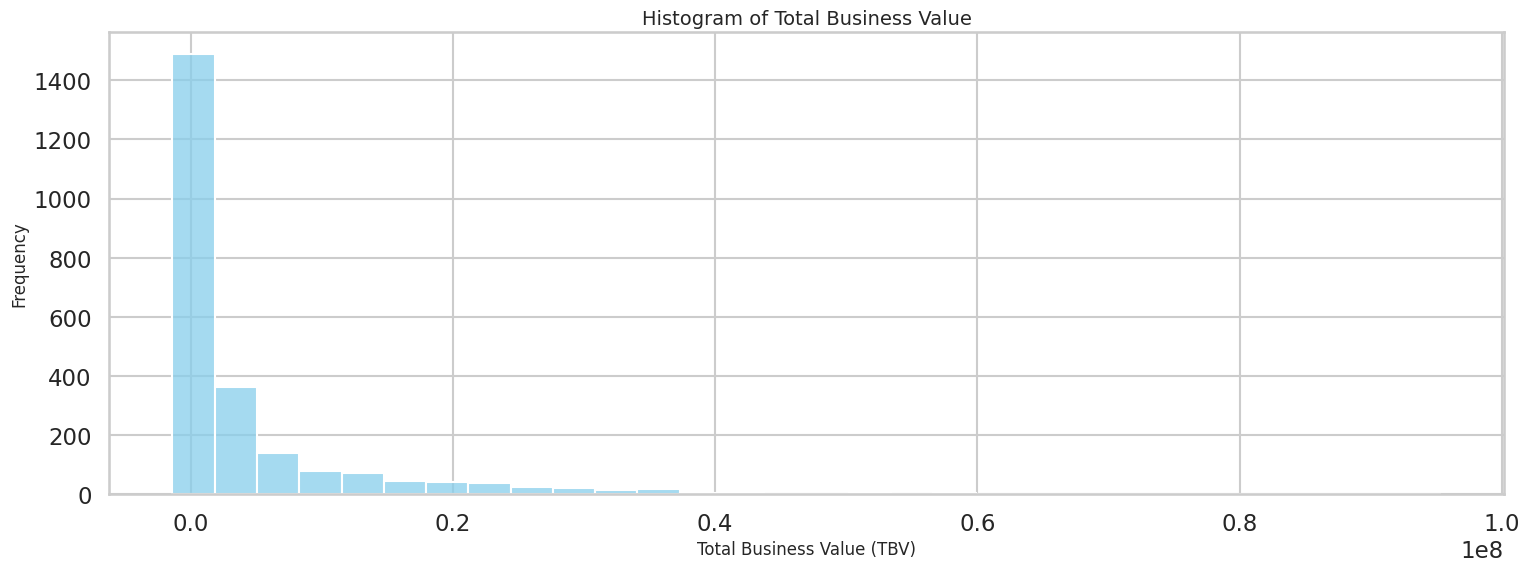

In [ ]:
# Create the histogram using Seaborn
plt.figure(figsize=(18, 6))
sns.histplot(data=data_3, x='tbv', bins=30, kde=False, color='skyblue')
plt.xlabel('Total Business Value (TBV)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Total Business Value', fontsize=14)

# Show the histogram
plt.show()

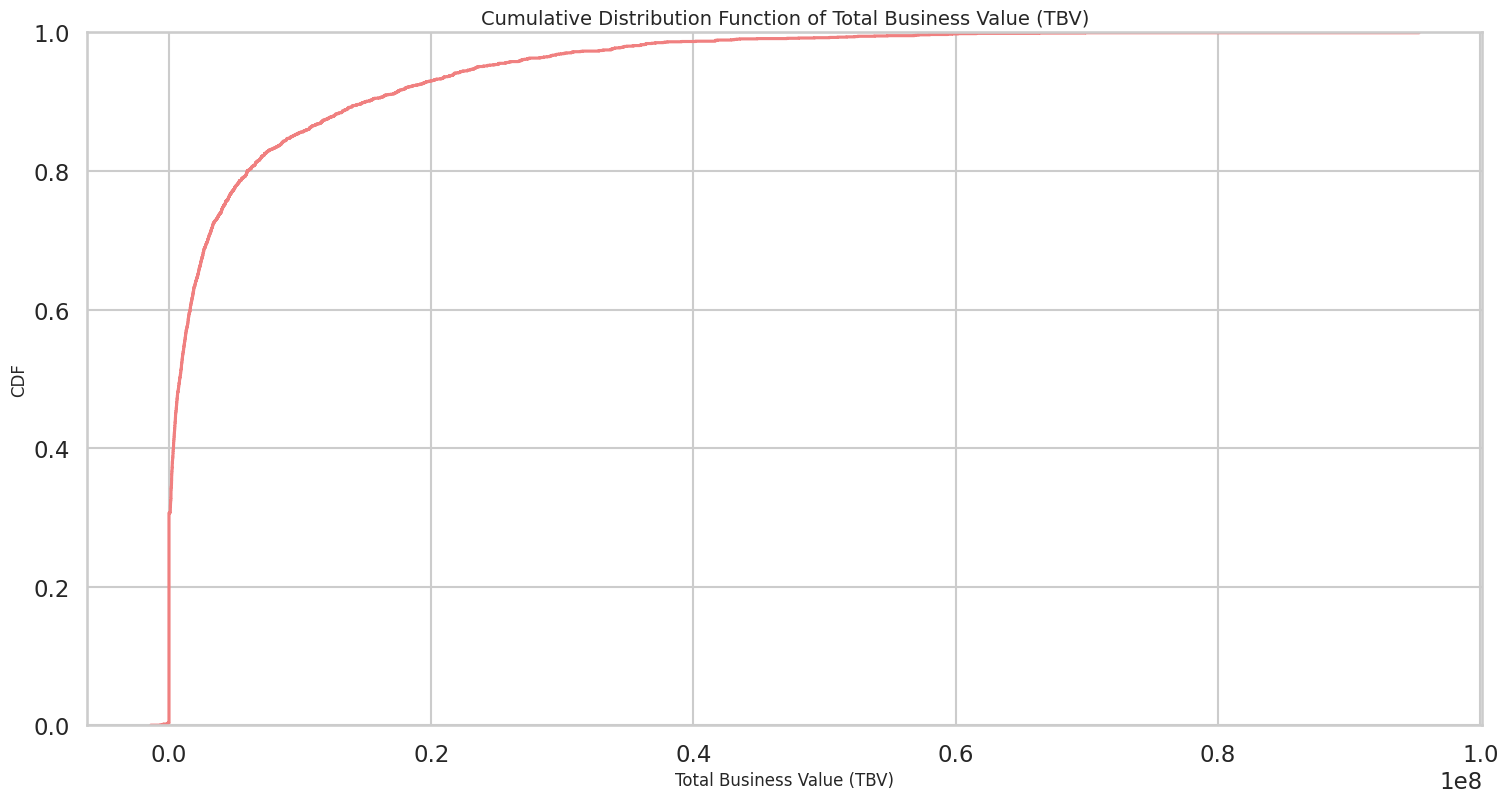

In [ ]:
# Create the CDF plot using Seaborn
plt.figure(figsize=(18,9))
sns.ecdfplot(data=data_3['tbv'], color='lightcoral')
plt.xlabel('Total Business Value (TBV)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.title('Cumulative Distribution Function of Total Business Value (TBV)', fontsize=14)

# Show the CDF plot
plt.show()

# Bivariate Analysis

In [ ]:
data_3.columns


Index(['Increased_Income', 'Gender', 'records_count', 'age', 'city',
       'education_level', 'income', 'joining_designation', 'grade', 'tbv',
       'quaterly_rating', 'churn', 'Quarterly_Rating_increased'],
      dtype='object')

In [ ]:
categorical_features = ['Increased_Income', 'Gender','city','education_level',
                   'joining_designation','grade','quaterly_rating','Quarterly_Rating_increased']


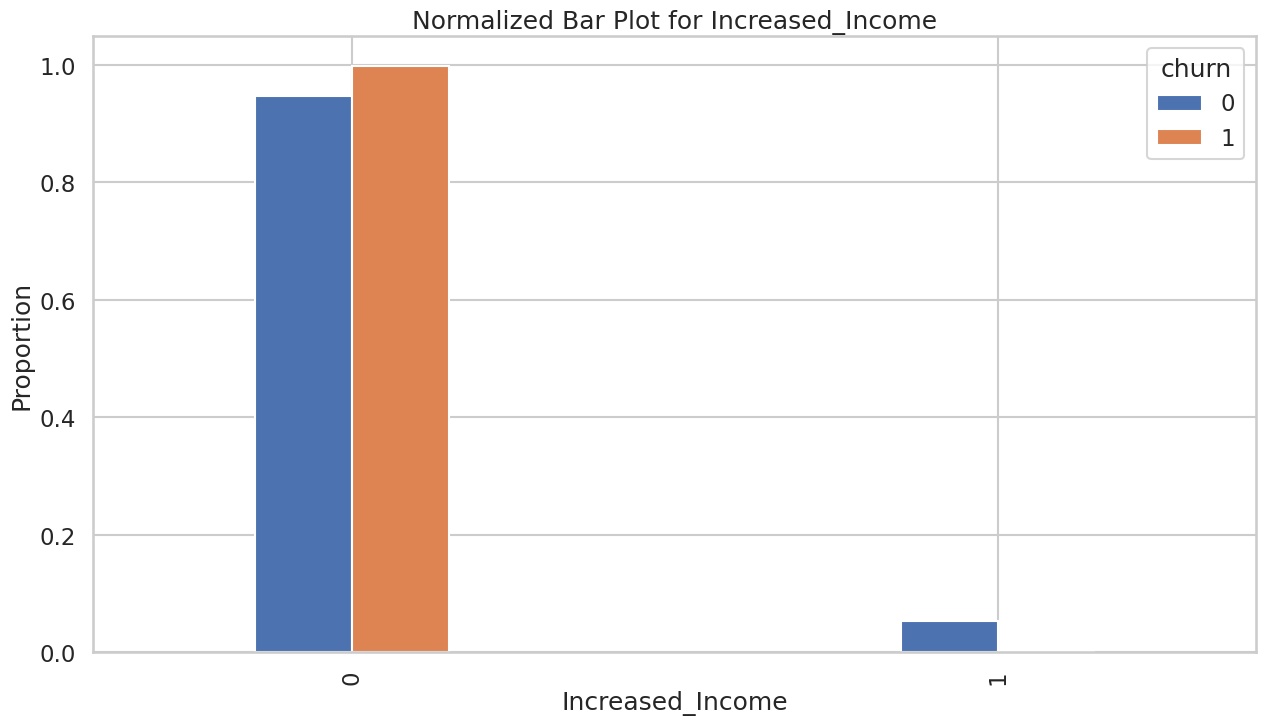

In [ ]:
# Bar Plot for 'Increased_Income' normalized on 'churn'
plt.figure(figsize=(15, 8))
pd.crosstab(index=data_3['Increased_Income'], columns=data_3['churn'], normalize='columns').plot(kind='bar', ax=plt.gca() ,width = 0.3)
plt.title('Normalized Bar Plot for Increased_Income')
plt.ylabel('Proportion')
plt.xlabel('Increased_Income')
plt.show()

* Drivers with no increase in monthly income are showing high churn rate.

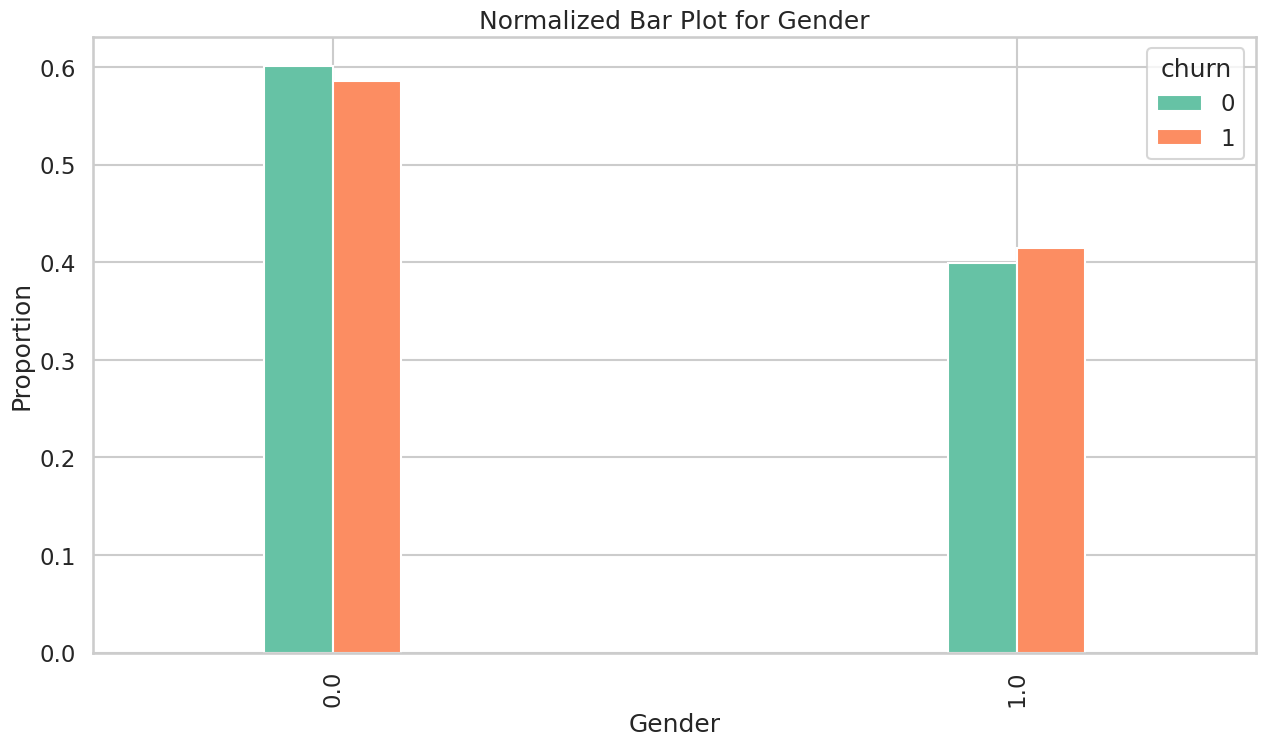

In [ ]:
# Set the color palette
sns.set_palette('Set2')

# Bar Plot for 'Gender' normalized on 'churn'
plt.figure(figsize=(15, 8))
pd.crosstab(index=data_3['Gender'], columns=data_3['churn'], normalize='columns').plot(kind='bar', ax=plt.gca(),width = 0.2)
plt.title('Normalized Bar Plot for Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.show()


* Churn rate is more in Male drivers as compared to female drivers.

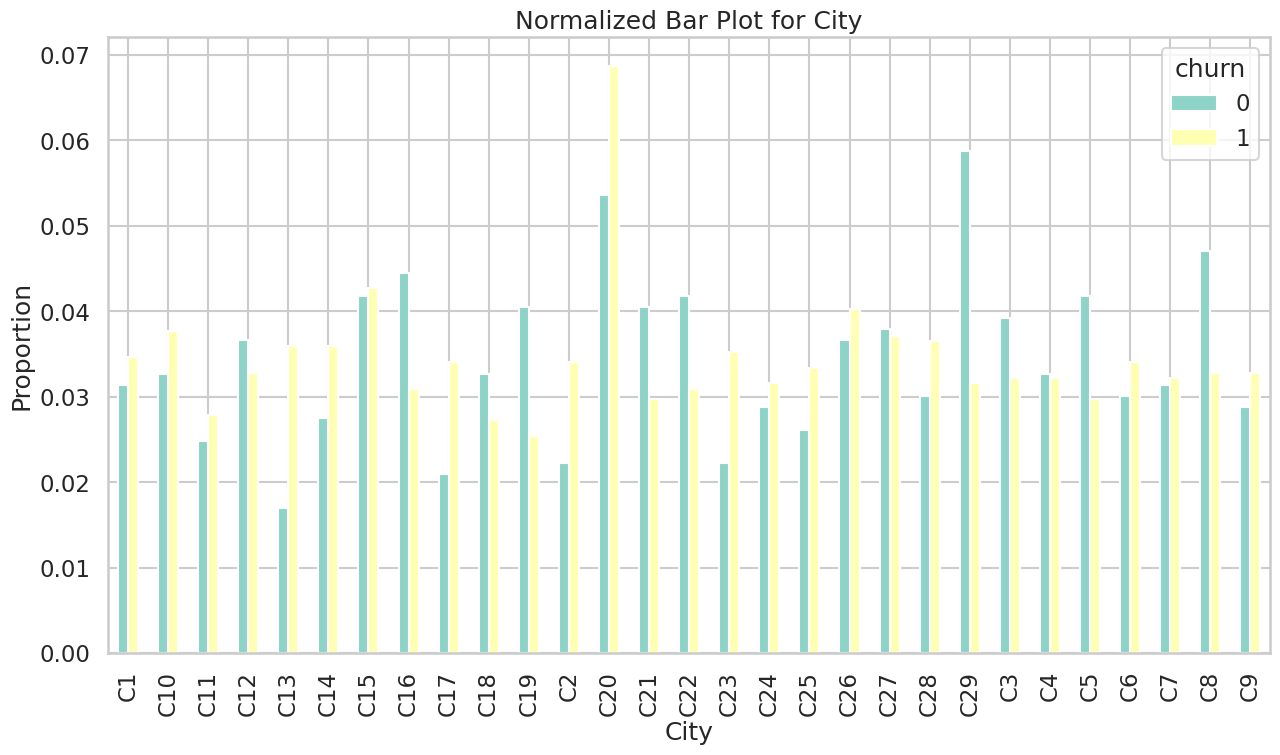

In [ ]:
# Set the color palette
sns.set_palette('Set3')

# Bar Plot for 'city' normalized on 'churn'
plt.figure(figsize=(15, 8))
pd.crosstab(index=data_3['city'], columns=data_3['churn'], normalize='columns').plot(kind='bar', ax=plt.gca(), color=sns.color_palette('Set3'))
plt.title('Normalized Bar Plot for City')
plt.ylabel('Proportion')
plt.xlabel('City')
plt.show()

* Churn rate is highest amongst C20 city.
* No Churn rate is the highest among C29 city.

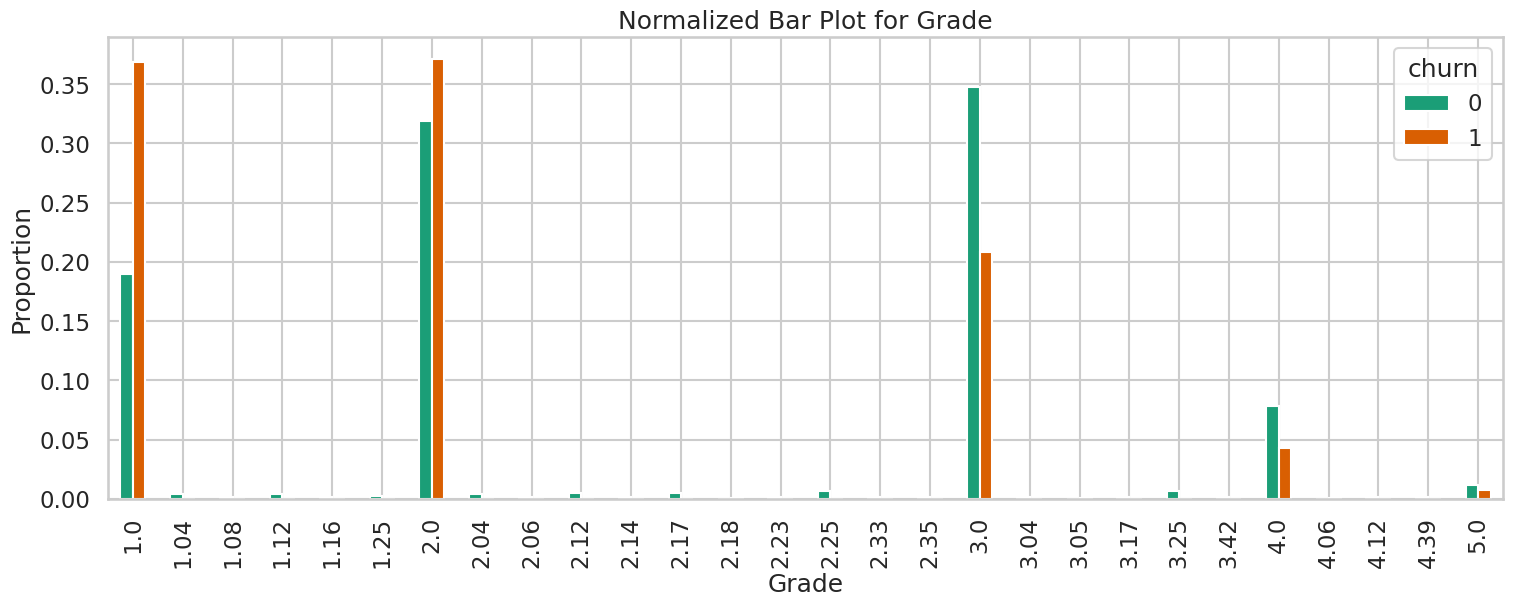

In [ ]:
# Set the color palette
sns.set_palette('Dark2')

# Bar Plot for 'grade' normalized on 'churn'
plt.figure(figsize=(18, 6))
pd.crosstab(index=data_3['grade'], columns=data_3['churn'], normalize='columns').plot(kind='bar', ax=plt.gca(), color=sns.color_palette('Dark2'))
plt.title('Normalized Bar Plot for Grade')
plt.ylabel('Proportion')
plt.xlabel('Grade')
plt.show()


* Churn rate is the highest among drivers having 1.0 and 2.0 grades

<Axes: >

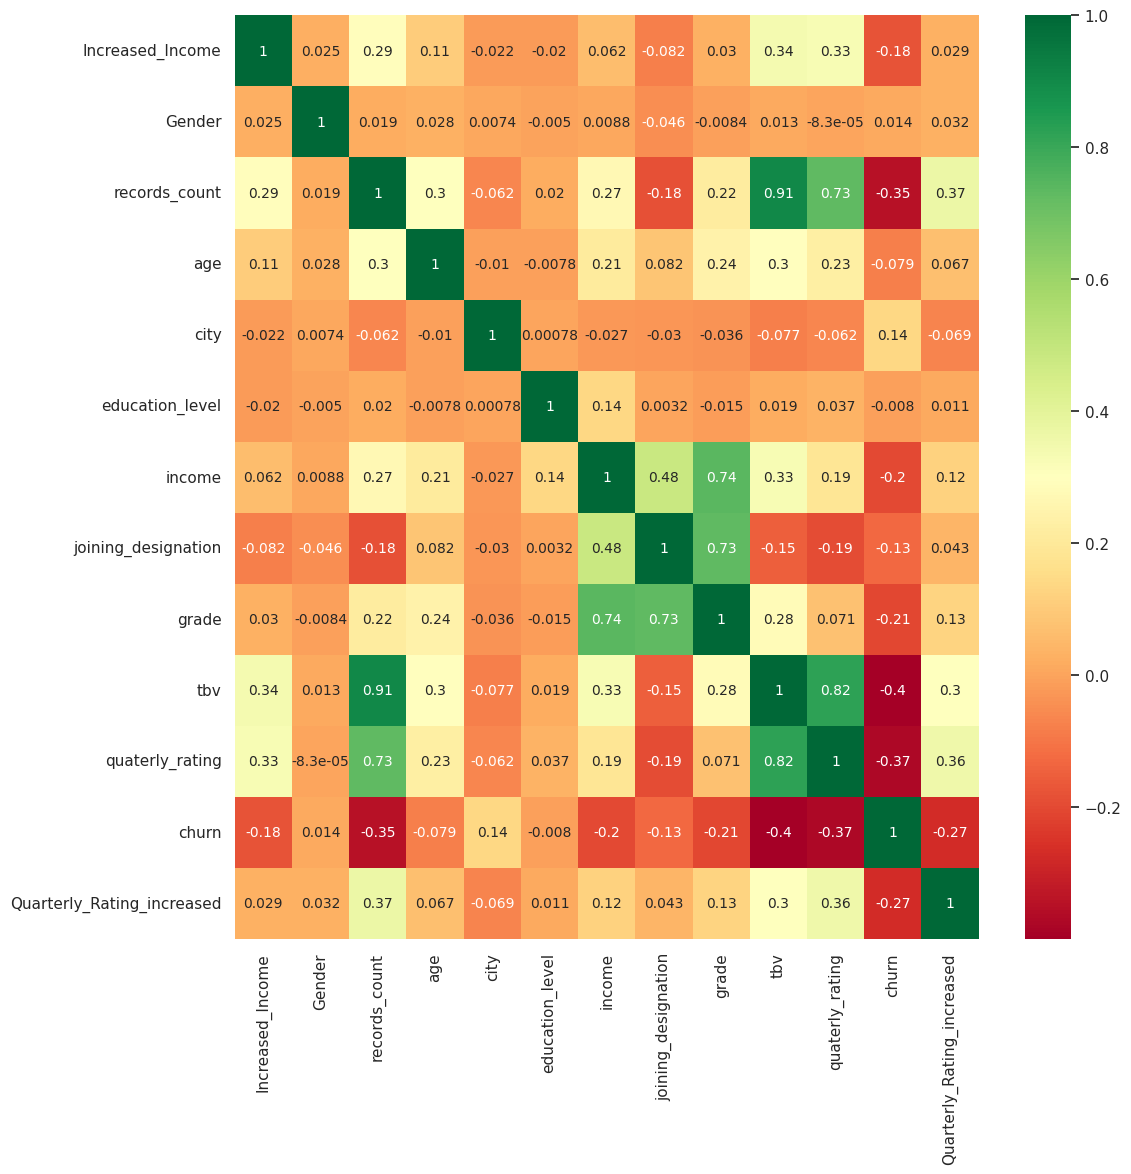

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_3.corr(),annot=True, cmap="RdYlGn", annot_kws={"size":10})

* Churn and records_count have negative correlation of **-0.35**
* Records_count has high correlation with Total Business value and quarterly rating.
* Churn and Total Business value have negative correlation of **-0.4** , similary churn and quaterly rating have negative correlation of **-0.35**.

# Outlier detection and handling

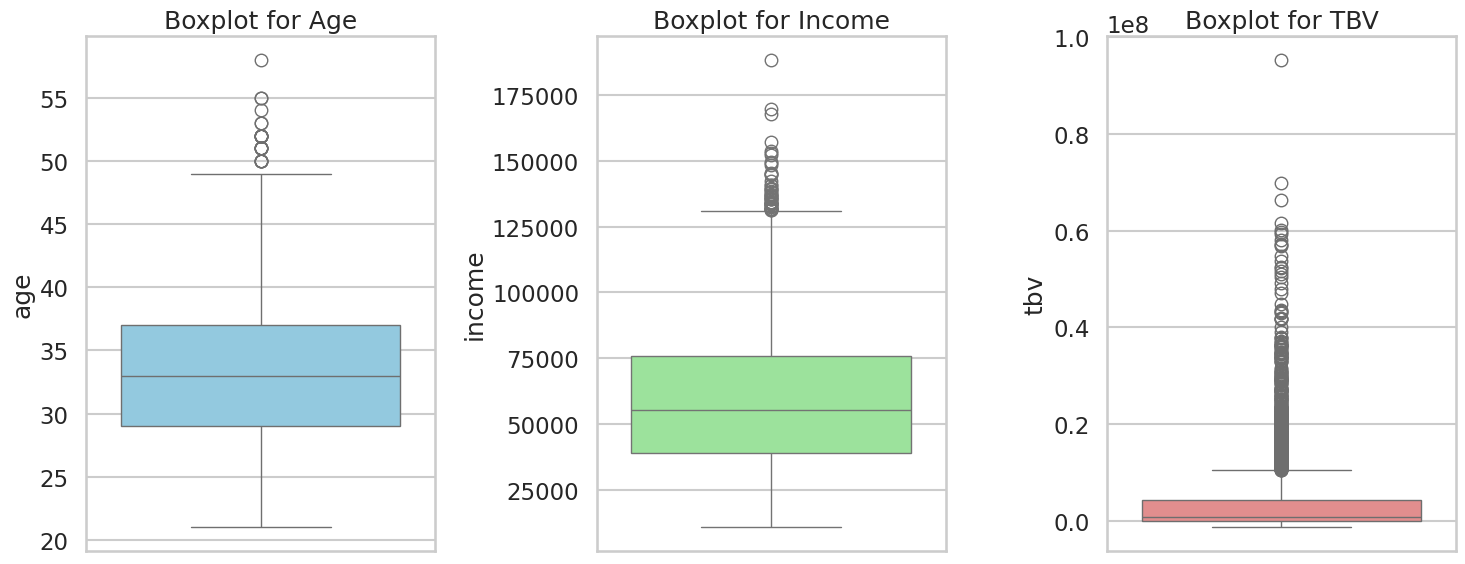

In [ ]:
# Set the color palette
sns.set_palette('Set3')

# Create boxplots
plt.figure(figsize=(15, 6))

# Boxplot for 'age'
plt.subplot(1, 3, 1)
sns.boxplot(y=data_3['age'], color='skyblue')
plt.title('Boxplot for Age')

# Boxplot for 'income'
plt.subplot(1, 3, 2)
sns.boxplot(y=data_3['income'], color='lightgreen')
plt.title('Boxplot for Income')

# Boxplot for 'tbv'
plt.subplot(1, 3, 3)
sns.boxplot(y=data_3['tbv'], color='lightcoral')
plt.title('Boxplot for TBV')

plt.tight_layout()
plt.show()

* Heavy presence of Outliers in Total Business Value and Income features.
* We have to clip these outliers.

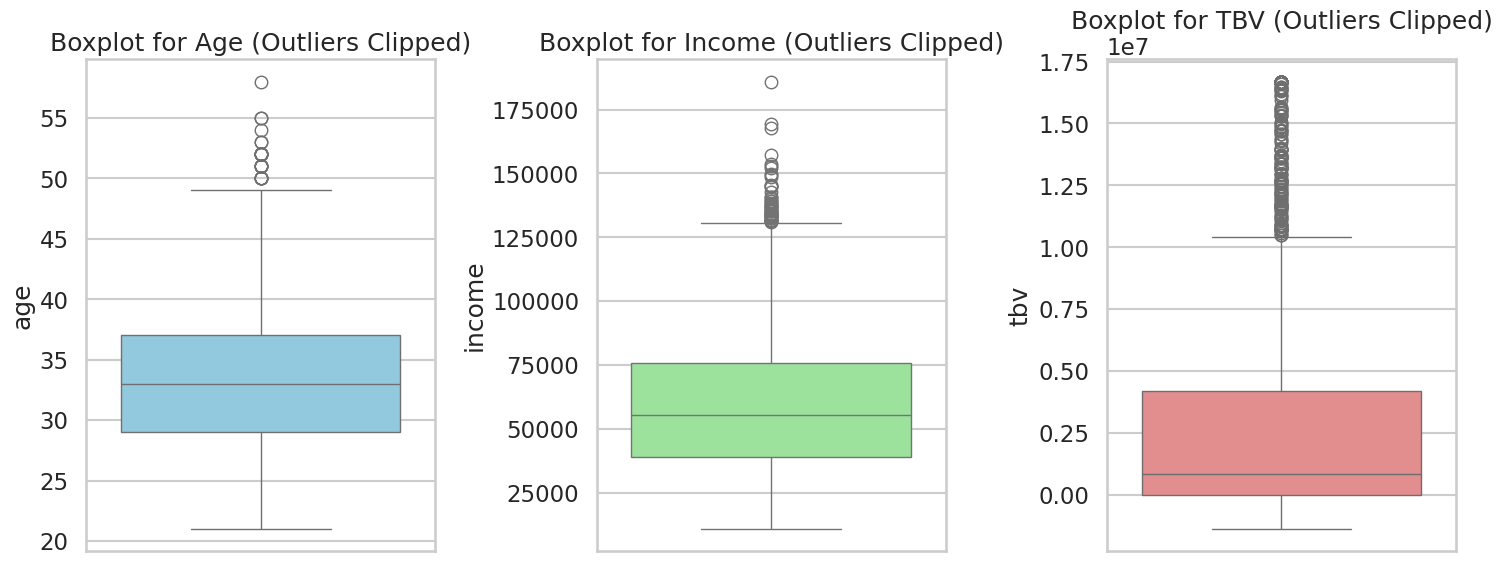

In [ ]:
# Function to clip outliers using IQR method
def clip_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    data[feature] = np.clip(data[feature], lower_limit, upper_limit)
    return data

# Clipping outliers for 'age', 'income', and 'tbv'
data_3 = clip_outliers(data_3, 'age')
data_3 = clip_outliers(data_3, 'income')
data_3 = clip_outliers(data_3, 'tbv')

# Set the color palette
sns.set_palette('Set3')

# Create boxplots
plt.figure(figsize=(15, 6))

# Boxplot for 'age'
plt.subplot(1, 3, 1)
sns.boxplot(y=data_3['age'], color='skyblue')
plt.title('Boxplot for Age (Outliers Clipped)')

# Boxplot for 'income'
plt.subplot(1, 3, 2)
sns.boxplot(y=data_3['income'], color='lightgreen')
plt.title('Boxplot for Income (Outliers Clipped)')

# Boxplot for 'tbv'
plt.subplot(1, 3, 3)
sns.boxplot(y=data_3['tbv'], color='lightcoral')
plt.title('Boxplot for TBV (Outliers Clipped)')

plt.tight_layout()
plt.show()


In [ ]:
data_3.columns

Index(['Increased_Income', 'Gender', 'records_count', 'age', 'city',
       'education_level', 'income', 'joining_designation', 'grade', 'tbv',
       'quaterly_rating', 'churn', 'Quarterly_Rating_increased'],
      dtype='object')

## TargetEncoder

In [ ]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

In [ ]:
data_3["city"] = TE.fit_transform(X = data_3["city"],y = data_3["churn"])



# Train-Test Split

In [ ]:
X = data_3.drop(['churn'],axis = 1)
y = data_3['churn']

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)



In [ ]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Scaling using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

# Random Forest Classifier (Bagging)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

RF = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None
)


In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced', max_depth=10)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.7862394957983193, 0.7714884696016772)

In [ ]:
RF.feature_importances_

array([5.27472996e-03, 4.31919232e-06, 2.71761849e-01, 6.34080921e-03,
       1.41297141e-02, 1.35170638e-04, 2.92481734e-02, 1.11923144e-01,
       6.24234909e-02, 2.33189635e-01, 1.74056666e-01, 9.15122989e-02])

In [ ]:
X.columns

Index(['Increased_Income', 'Gender', 'records_count', 'age', 'city',
       'education_level', 'income', 'joining_designation', 'grade', 'tbv',
       'quaterly_rating', 'Quarterly_Rating_increased'],
      dtype='object')

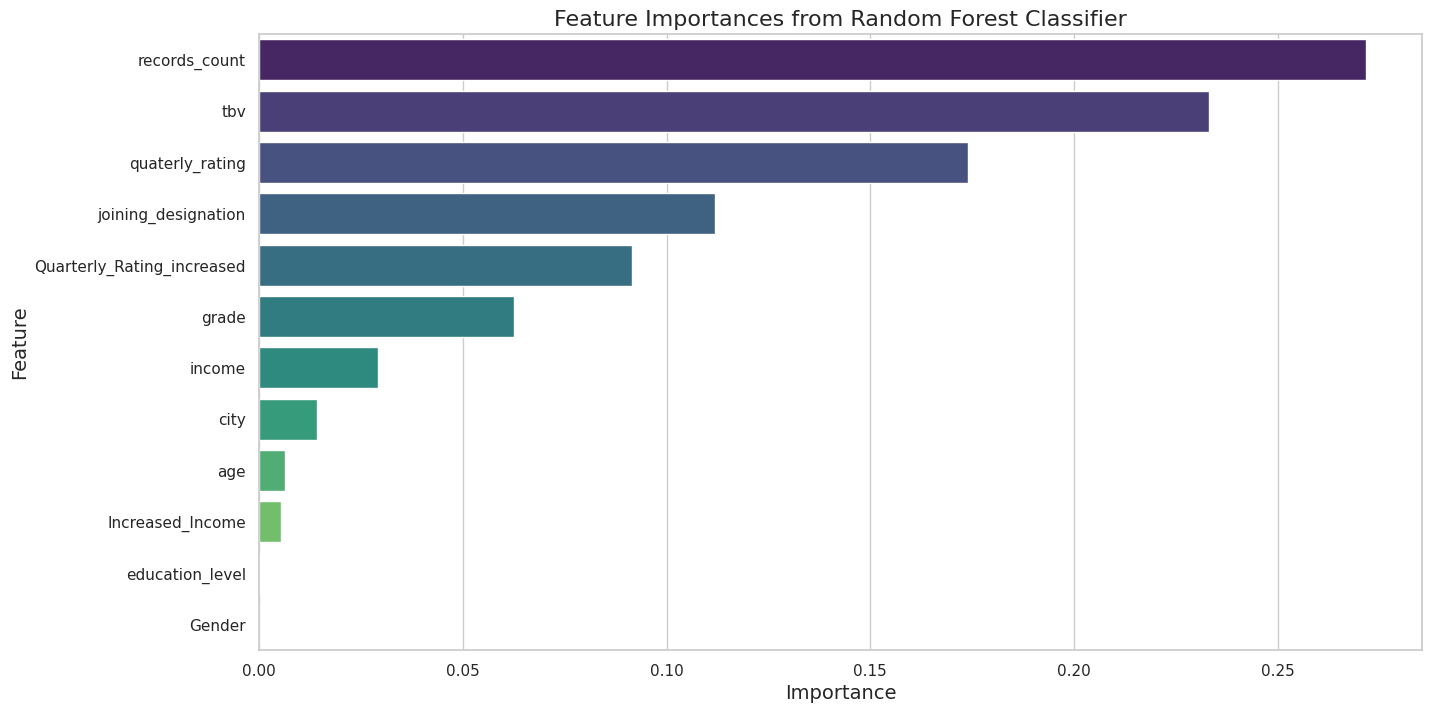

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': RF.feature_importances_
})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')

# Add labels and title
plt.title('Feature Importances from Random Forest Classifier', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

* According to Random Forest Total Business Value, records_count(No of times the driver reported) and quarterly rating are top features (as per feature importance).


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Predictions
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Scores
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

# Creating DataFrames for each metric
confusion_matrix_df = pd.DataFrame({
    'Train': cm_train.flatten(),
    'Test': cm_test.flatten()
}, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])

f1_score_df = pd.DataFrame({
    'Train': [f1_train],
    'Test': [f1_test]
}, index=['F1 Score'])

precision_score_df = pd.DataFrame({
    'Train': [precision_train],
    'Test': [precision_test]
}, index=['Precision Score'])

recall_score_df = pd.DataFrame({
    'Train': [recall_train],
    'Test': [recall_test]
}, index=['Recall Score'])

# Displaying the tables
print("Confusion Matrix:")
print(confusion_matrix_df)

print("\nF1 Score:")
print(f1_score_df)

print("\nPrecision Score:")
print(precision_score_df)

print("\nRecall Score:")
print(recall_score_df)


Confusion Matrix:
                Train  Test
True Negative     404    92
False Positive    211    58
False Negative    196    51
True Positive    1093   276

F1 Score:
             Train      Test
F1 Score  0.843039  0.835098

Precision Score:
                   Train      Test
Precision Score  0.83819  0.826347

Recall Score:
                 Train      Test
Recall Score  0.847944  0.844037


# Using Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
kfold = KFold(n_splits=10)

cv_acc_results = cross_validate(RF, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

In [ ]:
print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 78.83 
 Validation: 77.31
K-Fold Accuracy Std: 
 Train: 0.44, 
 Validation: 3.27


# Hyperparameter Tuning : GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


In [ ]:
grid_search.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, max_depth=7, max_features=7)

In [ ]:
grid_search.best_score_

0.8135505932420909

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.001, 'max_depth': 7, 'max_features': 7, 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [ ]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced', max_depth=7)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8781512605042017, 0.8092243186582809)

In [ ]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)


(0.8647845468053492, 0.911787072243346)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)


(0.8410404624277457, 0.8941088739746458)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8899082568807339, 0.930178432893716)

# Boosting

## Gradient Boosting Decision Tree (GBDT) Classifier

* Before using GBDT, we should balance out the data.
* To do that SMOTE is used

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

churn
0    1289
1    1289
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Step size shrinkage
    max_depth=3,            # Maximum depth of the individual trees
    random_state=42
)

# Train the model on the SMOTE-resampled dataset
gbdt.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
y_train_pred = gbdt.predict(X_train_smote)
y_test_pred = gbdt.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train_smote, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Scores
f1_train = f1_score(y_train_smote, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

precision_train = precision_score(y_train_smote, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train_smote, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

# Creating DataFrames for each metric
confusion_matrix_df = pd.DataFrame({
    'Train': cm_train.flatten(),
    'Test': cm_test.flatten()
}, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])

f1_score_df = pd.DataFrame({
    'Train': [f1_train],
    'Test': [f1_test]
}, index=['F1 Score'])

precision_score_df = pd.DataFrame({
    'Train': [precision_train],
    'Test': [precision_test]
}, index=['Precision Score'])

recall_score_df = pd.DataFrame({
    'Train': [recall_train],
    'Test': [recall_test]
}, index=['Recall Score'])

# Displaying the tables
print("Confusion Matrix:")
print(confusion_matrix_df)

print("\nF1 Score:")
print(f1_score_df)

print("\nPrecision Score:")
print(precision_score_df)

print("\nRecall Score:")
print(recall_score_df)


Confusion Matrix:
                Train  Test
True Negative    1077   101
False Positive    212    49
False Negative    127    38
True Positive    1162   289

F1 Score:
           Train      Test
F1 Score  0.8727  0.869173

Precision Score:
                    Train     Test
Precision Score  0.845706  0.85503

Recall Score:
                 Train      Test
Recall Score  0.901474  0.883792


## ROC curve and Precision Recall Curve

In [ ]:
# Predict probabilities
probs_train = gbdt.predict_proba(X_train_smote)[:, 1]
probs_test = gbdt.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve,auc
# Function to plot Precision-Recall Curve
def plot_pre_curve(y_test, probs, title_suffix=""):
    precision, recall, thresholds = precision_recall_curve(y_test, probs)

    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Plot the precision-recall curve
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve')

    # Plot the baseline (random chance)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='No Skill')

    plt.title(f"Precision-Recall Curve {title_suffix}", fontsize=20)
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()

# Function to plot ROC Curve
def plot_roc(y_test, probs, title_suffix=""):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Plot the ROC curve
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')

    # Plot the baseline (random chance)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

    plt.title(f"ROC Curve {title_suffix}", fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()


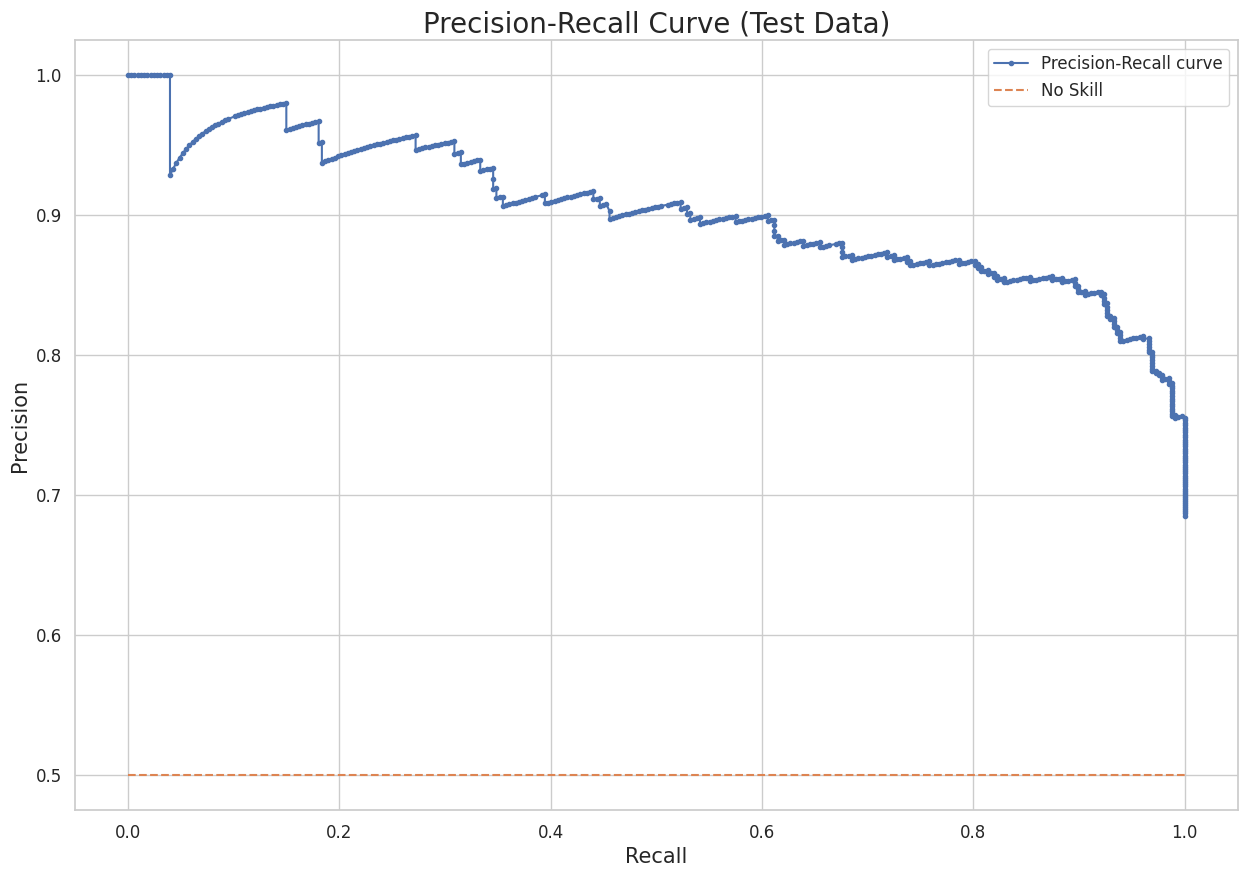

In [ ]:
plot_pre_curve(y_test, probs_test, title_suffix="(Test Data)")

* The curve shows high precision (close to 1.0) when recall is also high, which indicates that the model performs well in identifying true positives without many false positives.
* There is a noticeable drop in precision as recall increases, particularly towards the higher end of recall. This is common as the model tries to capture more true positives, it may also capture more false positives, leading to a drop in precision.

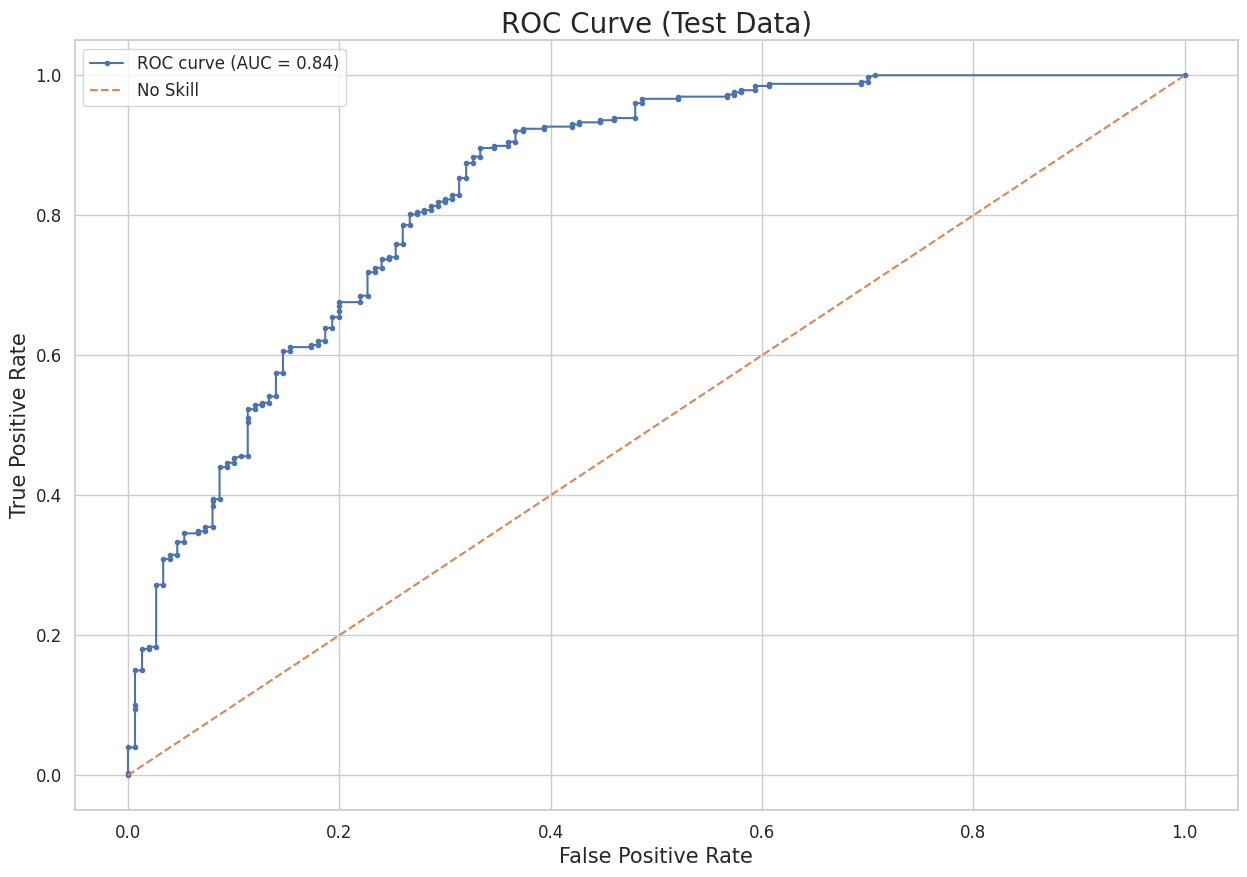

In [ ]:
plot_roc(y_test, probs_test, title_suffix="(Test Data)")

* The ROC curve has an AUC of 0.85. This indicates that the model has a good ability to distinguish between positive and negative classes.
* An AUC value closer to 1 implies a better performance, while an AUC value of 0.5 implies a performance similar to random guessing.

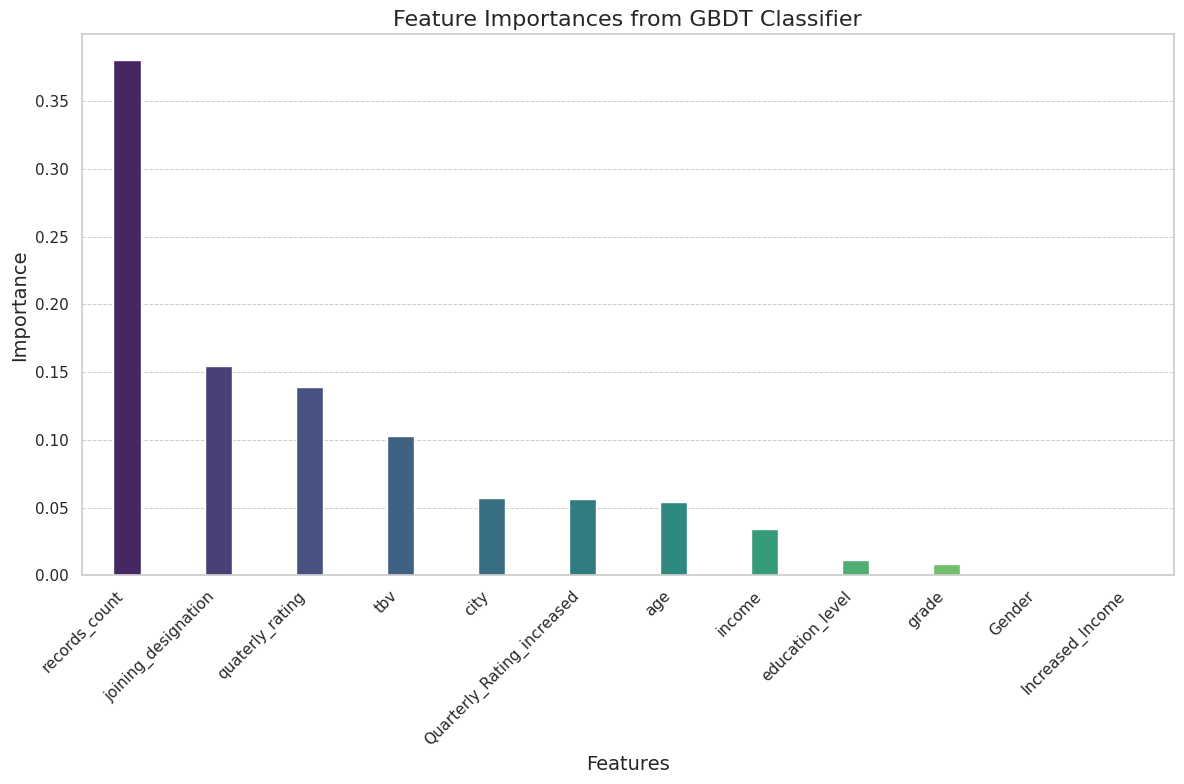

In [ ]:
# Create DataFrame for feature importances
feature_importances = pd.DataFrame(data=gbdt.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"])

# Sort the features by importance for better visualization
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Set the style using Seaborn
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("viridis", len(feature_importances))

# Plot the bar plot with enhancements
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=feature_importances.index, y="Importance", data=feature_importances, palette=palette ,width = 0.3)

# Rotate x labels for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add title and labels
plt.title("Feature Importances from GBDT Classifier", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Hyperparameter Tuning : GBDT

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_gbdt = grid_search.best_estimator_

# Evaluate the best model
y_test_pred_best = best_gbdt.predict(X_test)
print("Best model accuracy: ", accuracy_score(y_test, y_test_pred_best))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best model accuracy:  0.7735849056603774


## XGBoosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the SMOTE-resampled dataset
xgb_clf.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
probs_train = xgb_clf.predict_proba(X_train_smote)[:, 1]
probs_test = xgb_clf.predict_proba(X_test)[:, 1]

In [ ]:
y_train_pred = xgb_clf.predict(X_train_smote)
y_test_pred = xgb_clf.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_f1 = f1_score(y_train_smote, y_train_pred)
train_precision = precision_score(y_train_smote, y_train_pred)
train_recall = recall_score(y_train_smote, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train_smote, y_train_pred)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
metrics = {
    'Accuracy': [train_accuracy, test_accuracy],
    'F1 Score': [train_f1, test_f1],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall]
}

results_df = pd.DataFrame(metrics, index=['Training', 'Test'])

print("Evaluation Metrics:\n", results_df)
print("\nConfusion Matrix (Training):\n", train_confusion_matrix)
print("\nConfusion Matrix (Test):\n", test_confusion_matrix)

Evaluation Metrics:
           Accuracy  F1 Score  Precision    Recall
Training  0.994569  0.994586   0.991519  0.997673
Test      0.777778  0.843195   0.816619  0.871560

Confusion Matrix (Training):
 [[1278   11]
 [   3 1286]]

Confusion Matrix (Test):
 [[ 86  64]
 [ 42 285]]


## ROC and Precision Recall Curve

In [ ]:
# Function to plot Precision-Recall Curve
def plot_pre_curve(y_true, probs, title_suffix=""):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)

    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Plot the precision-recall curve
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve')

    # Plot the baseline (random chance)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='No Skill')

    plt.title(f"Precision-Recall Curve {title_suffix}", fontsize=20)
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()

# Function to plot ROC Curve
def plot_roc(y_true, probs, title_suffix=""):
    fpr, tpr, thresholds = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Plot the ROC curve
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')

    # Plot the baseline (random chance)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

    plt.title(f"ROC Curve {title_suffix}", fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()


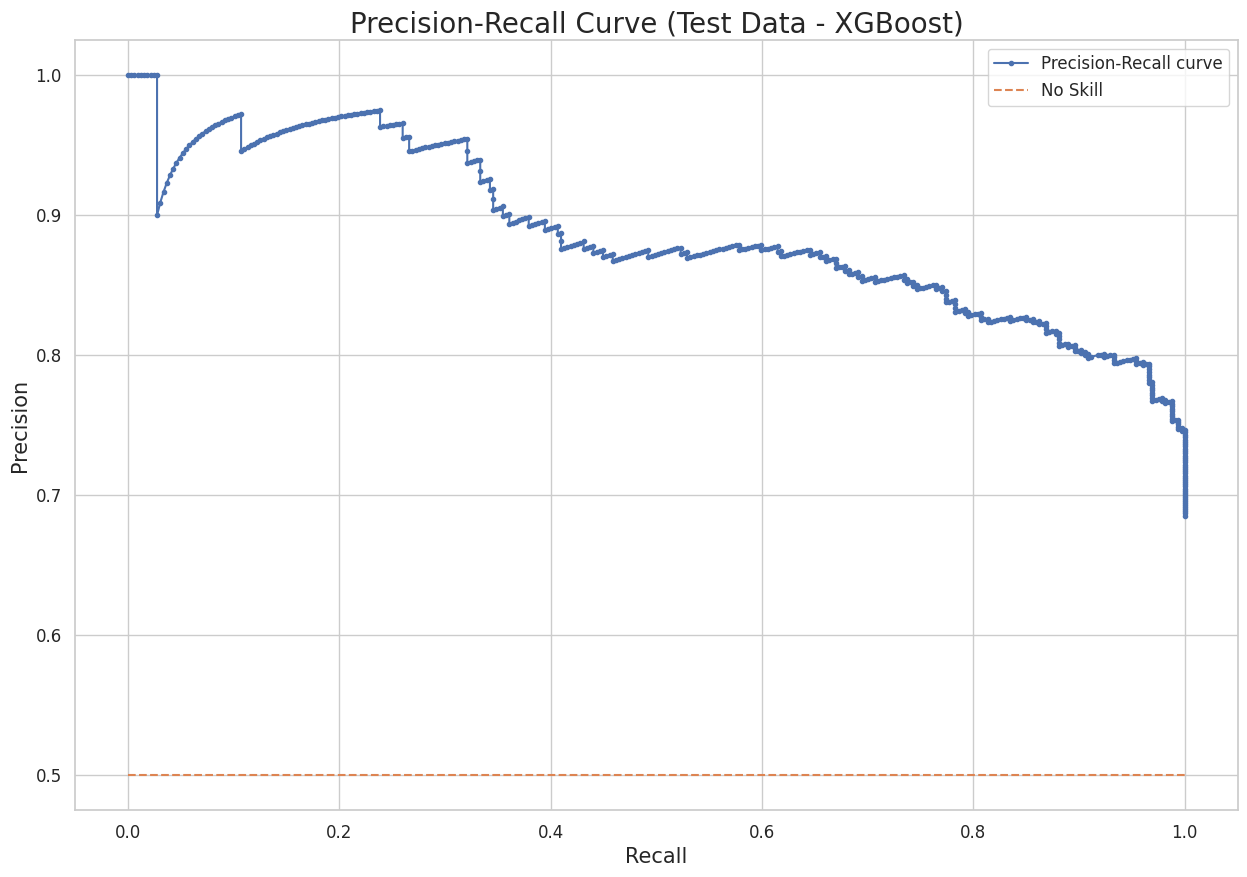

In [ ]:
plot_pre_curve(y_test, probs_test, title_suffix="(Test Data - XGBoost)")

* Initially Precision is highest (1) and remained constant for sometime, which shows model has not done a single false positive prediction and predicted all true positives correctly.
* As recall value increased further there is sudden decrease in Precision ie. expected tradeoff is happening.
* At this threshold the model starts to misclassify more false positives in an attempt to identify more true positives, leading to a drop in precision.

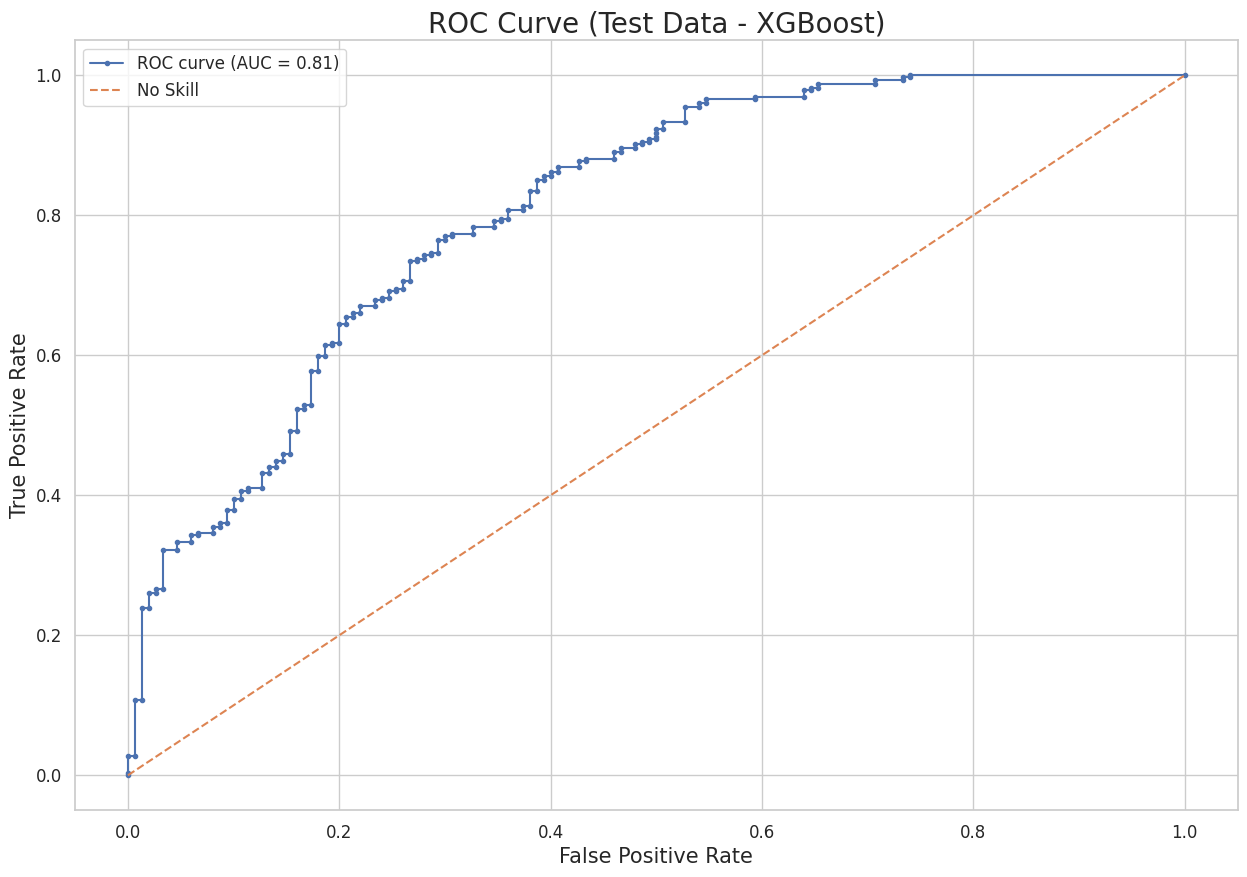

In [ ]:
plot_roc(y_test, probs_test, title_suffix="(Test Data - XGBoost)")

* The AUC value is **0.81**, which indicates good performance. An AUC of **0.81** means there is an **81% chance that the model will correctly distinguish between a positive and a negative class**. This value suggests the model has a strong capability to differentiate between the classes.
* The ROC curve rises sharply towards the top-left corner, indicating that the model performs well initially in distinguishing between classes. However, there is some fluctuation, which may indicate areas where the model's performance could be improved.
* The curve eventually approaches the top-right corner, showing that as the FPR increases, the TPR also increases, which is expected. However, the slope of the curve suggests that there are trade-offs between true positives and false positives at certain thresholds.

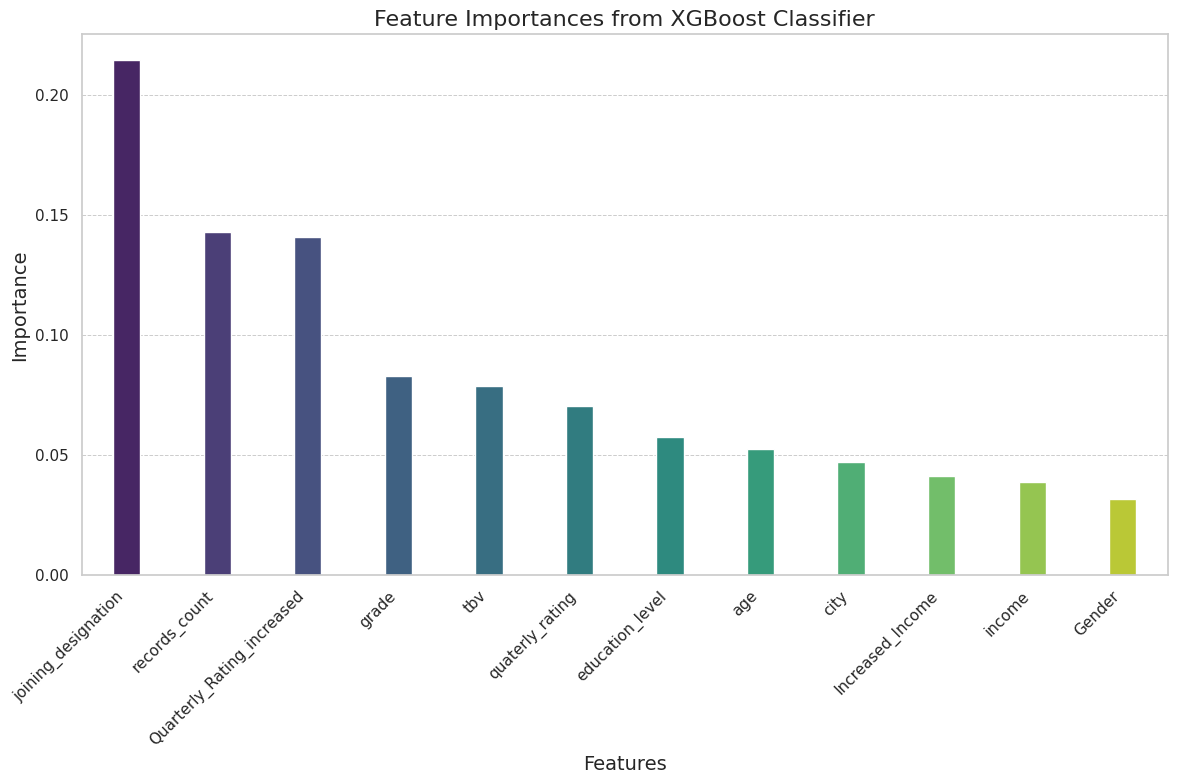

In [ ]:
# Create DataFrame for feature importances
feature_importances = pd.DataFrame(data=xgb_clf.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"])

# Sort the features by importance for better visualization
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Set the style using Seaborn
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("viridis", len(feature_importances))

# Plot the bar plot with enhancements
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=feature_importances.index, y="Importance", data=feature_importances, palette=palette,width = 0.3)

# Rotate x labels for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add title and labels
plt.title("Feature Importances from XGBoost Classifier", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Hyperparameter Tuning : XGBoost

In [ ]:
params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

In [ ]:
# using RandomizedSearch CV
random_search = RandomizedSearchCV(xgb_clf,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)

In [ ]:
random_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best model
best_xgb = random_search.best_estimator_

# Evaluate the best model
y_test_pred_best = best_xgb.predict(X_test)
print("Best model accuracy: ", accuracy_score(y_test, y_test_pred_best))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best model accuracy:  0.7756813417190775


## LightGB

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state = 42)

# Train the model on the SMOTE-resampled dataset
lgb_clf.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 1289, number of negative: 1289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 2578, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [ ]:
y_train_pred = lgb_clf.predict(X_train_smote)
y_test_pred = lgb_clf.predict(X_test)

# Predict probabilities
probs_train = lgb_clf.predict_proba(X_train_smote)[:, 1]
probs_test = lgb_clf.predict_proba(X_test)[:, 1]


In [ ]:
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_f1 = f1_score(y_train_smote, y_train_pred, average='weighted')
train_precision = precision_score(y_train_smote, y_train_pred, average='weighted')
train_recall = recall_score(y_train_smote, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train_smote, y_train_pred)


In [ ]:
# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Create a DataFrame to display the results
metrics = {
    'Accuracy': [train_accuracy, test_accuracy],
    'F1 Score': [train_f1, test_f1],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall]
}

results_df = pd.DataFrame(metrics, index=['Training', 'Test'])

print("Evaluation Metrics:\n", results_df)
print("\nConfusion Matrix (Training):\n", train_confusion_matrix)
print("\nConfusion Matrix (Test):\n", test_confusion_matrix)

Evaluation Metrics:
           Accuracy  F1 Score  Precision    Recall
Training  0.975562  0.975557   0.975955  0.975562
Test      0.784067  0.779815   0.778319  0.784067

Confusion Matrix (Training):
 [[1239   50]
 [  13 1276]]

Confusion Matrix (Test):
 [[ 89  61]
 [ 42 285]]


### ROC Curve and Precision Recall Curve for LightGB

In [ ]:
# Function to plot Precision-Recall Curve
def plot_pre_curve(y_true, probs, title_suffix=""):
    precision, recall, thresholds = precision_recall_curve(y_true, probs)

    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Plot the precision-recall curve
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve')

    # Plot the baseline (random chance)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='No Skill')

    plt.title(f"Precision-Recall Curve {title_suffix}", fontsize=20)
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()

# Function to plot ROC Curve
def plot_roc(y_true, probs, title_suffix=""):
    fpr, tpr, thresholds = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Plot the ROC curve
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')

    # Plot the baseline (random chance)
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

    plt.title(f"ROC Curve {title_suffix}", fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()


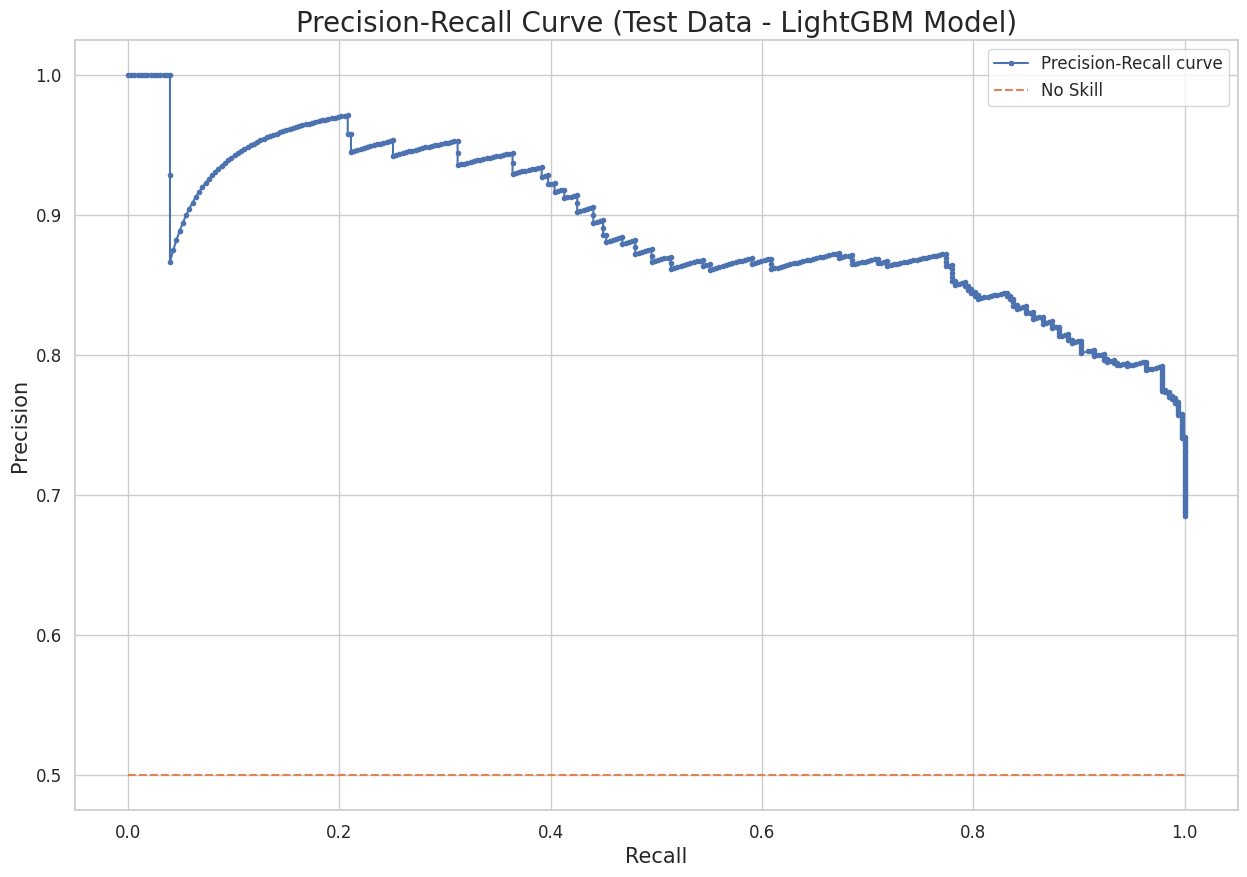

In [ ]:
# Plot Precision-Recall and ROC curves for test data
plot_pre_curve(y_test, probs_test, title_suffix="(Test Data - LightGBM Model)")

*  Initially, precision is near 1.0 even as recall increases, but it starts to drop as recall continues to increase.
* Precision starts close to 1.0 (100%) at lower recall values, meaning that when the model is more confident (classifying fewer instances as positive), it is almost always correct.
* As recall approaches 1.0, precision starts to drop, eventually falling off more sharply. This indicates that as the model tries to capture more true positives, it also starts including more false positives, reducing precision.

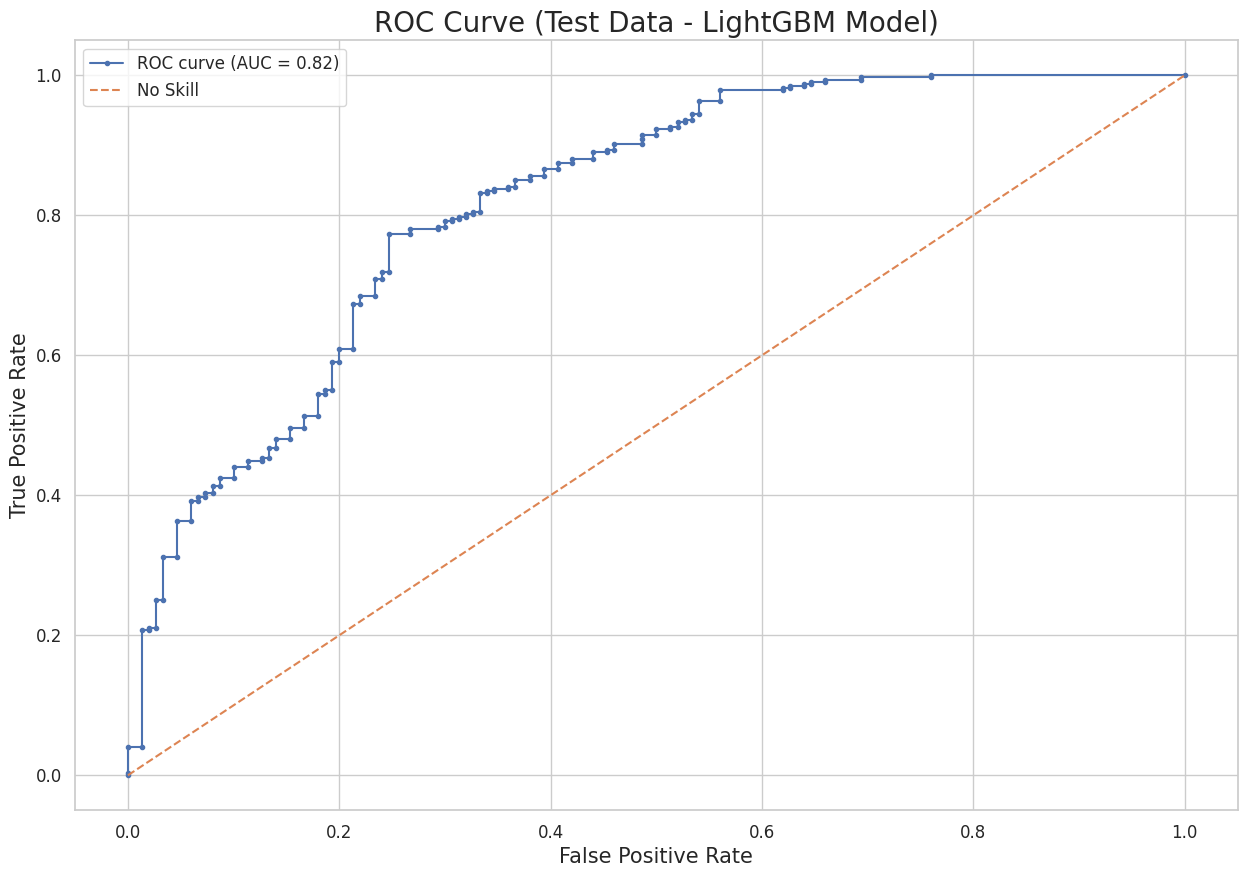

In [ ]:
plot_roc(y_test, probs_test, title_suffix="(Test Data - LightGBM Model)")

* The LightGBM model demonstrates strong performance in distinguishing between positive and negative cases, as indicated by the AUC of 0.82 and the shape of the ROC curve.

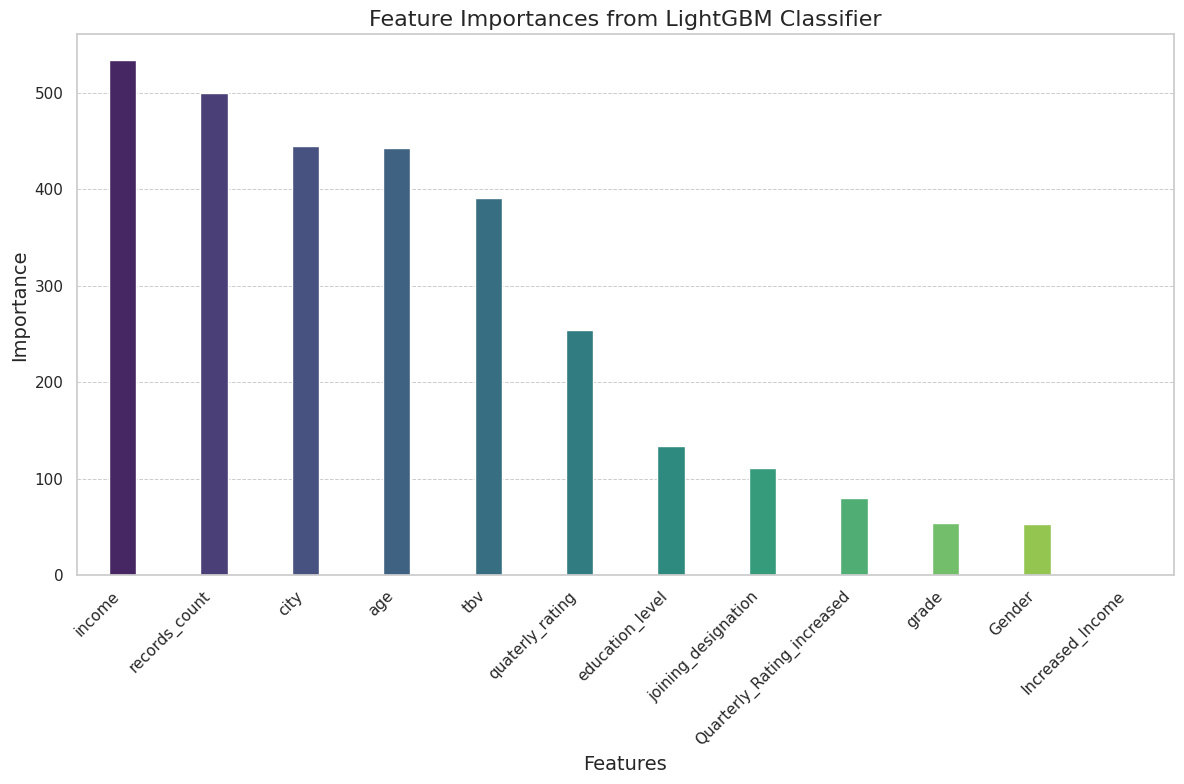

In [ ]:
# Create DataFrame for feature importances
feature_importances = pd.DataFrame(data=lgb_clf.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"])

# Sort the features by importance for better visualization
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Set the style using Seaborn
sns.set(style="whitegrid")

# Create a color palette
palette = sns.color_palette("viridis", len(feature_importances))

# Plot the bar plot with enhancements
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=feature_importances.index, y="Importance", data=feature_importances, palette=palette,width = 0.3)

# Rotate x labels for better readability
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add title and labels
plt.title("Feature Importances from LightGBM Classifier", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Hyperparameter Tuning : LightGB

In [ ]:
params = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}


In [ ]:
from scipy.stats import uniform, randint
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2 - 0.01),
    'max_depth': randint(3, 6)
}


In [ ]:
random_search = RandomizedSearchCV(estimator=lgb_clf, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the SMOTE-resampled training data
random_search.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1289, number of negative: 1289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 2578, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bda4e16f280>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bda5438d0c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bda5438d030>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Best parameters and best model
print("Best parameters found: ", random_search.best_params_)
best_lgbm = random_search.best_estimator_


Best parameters found:  {'learning_rate': 0.03714469540516875, 'max_depth': 5, 'n_estimators': 199}


In [ ]:
y_test_pred_best = best_lgbm.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_f1_best = f1_score(y_test, y_test_pred_best)

print("Best model accuracy on test set: ", test_accuracy_best)
print("Best model F1 score on test set: ", test_f1_best)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Best model accuracy on test set:  0.80083857442348
Best model F1 score on test set:  0.8592592592592593


* Metrices of Models:
  * RF Bagging : 77.14
    * After Hyperparameter tuning 81.35
    * Precision : 84.63
    * Recall : 89
  * Boosting:
    * GBDT : 77.35
      * Precision : 85.57
      * Recall : 88.37
      * AUC : 0.84
    * XGBoosting : 77.78
      * Precision : 81.66
      * Recall : 87.15
      * AUC : 0.81
    * LightGB : 80.00
      * Precision : 77.83
      * Recall : 78.4
      * AUC : 0.82


# Recommendations :
1. Churn Reduction Strategies:
* Focus on drivers who have not seen an income increase. Identify specific reasons for their lack of income growth and provide personalized support.
* Since churn is highest among drivers in the C20 city category, implement city-specific retention programs. This could involve localized incentives or support initiatives tailored to the unique challenges faced in these areas.
* Since churn rate is higher among male drivers, develop programs specifically aimed at retaining male drivers. This could include mentorship programs, financial planning support, or wellness initiatives.

2. Improve Driver Grades:
* Offer continuous training and skill development programs to help drivers improve their grades. Focus on areas that contribute to higher grades such as customer service, safe driving practices, and efficient route planning.
* Implement a system to regularly monitor and provide feedback on driver performance. Use this data to identify drivers at risk of receiving low grades and provide proactive support.

3. Incentives and Rewards :
* Introduce incentive programs that reward drivers for consistent performance, low churn risk, and high customer ratings.